# Final Project
Dataset             :  Bank marketing campaigns dataset | Opening Deposit </br>
Disusun Oleh    :  Roberto Benedict & Gretty Margaretha</br>
Kelas                 :  JCDSOL-013(B)

## A. Business Problem Understanding

### Context :
Bank marketing campaigns dataset analysis - Opening a Term Deposit dataset is a dataset describing a Portugal bank marketing campaigns results. Conducted campaigns were based mostly on direct phone calls, offering bank client to place a term deposit.

**Socio-economic conditions in the campaign period: May 2008 to June 2013**
- Post global financial crisis effects in Portugal
- Bank restructuring of Banco Montepio

Due to the nature of the conditions during the period, a potential client would also have lower interest in subscribing for term deposit, which in turn would make cost of outreach or promotion cost higher to accomodate the lower interest of the clients. 

If after all marketing efforts client had agreed to place deposit - target variable marked 'yes', otherwise 'no'

Target y (term): 

* 0 : no, disagree to place deposit
* 1 : yes, agree to place deposit

### Problem Statement :

The marketing process can consume significant time and resources if the bank targets all potential clients without prior filtering or targeted marketing, resulting in wasted time and resources. The effects are more dramatic in the post global financial crisis socio-economic conditions bringing about the crucial requirement of the bank to prioritize minimizing costs due to the higher reaching out cost for new clients in the economic climate. The bank wants to increase marketing efficiency by identifying which potential clients are likely to agree to open a term deposit account.

### Goals :
1. Identify client feature patterns for the most probable potential clients:
    * Most important features correlated with the target
    * Seasonality
    * Socio-economic conditions
2. Minimize revenue loss through promotion costs minimization : How much budget allocation percentage would be minimized ?

Based on these issues, the bank aims to predict the likelihood of a client agreeing to open a term deposit account. This can support the bank in executing marketing strategies focused on clients most likely to be interested, thereby saving costs, time, and resources.

Additionally, the bank wants to understand the factors influencing a client's decision to open a term deposit account or not, enabling them to develop better plans for approaching potential clients.

### Stakeholder :
* Bank marketing division : as main the stakeholder and the user of the resulting model, marketing division will minimize promotion cost by minimizing revenue loss through lower promotion cost due to more targeted marketing.

### Analytic Approach :

Our approach will involve analyzing the data to discover patterns that distinguish clients who are likely to open a term deposit account from those who are not. 

Then, a classification model will be developed to help the bank predict the probability of a client wanting to open a term deposit account.

### Metric Evaluation :

![img](Image/confusion_matrix.png)

In the context of predicting banking term deposit subscriptions, deciding whether to emphasize false negatives or false positives depends on the specific business objectives and costs associated with each type of error.

**Type I error - False Positives (FP)**
False positive occurs when the model predicts that a client will subscribe to a term deposit when they actually will not. Emphasizing minimizing false positives is important if:
- **Marketing Costs**: If the cost of reaching out to uninterested clients is high, it would be prudent to reduce false positives to avoid wasting resources.
- **Client Experience**: Repeatedly targeting uninterested clients can lead to negative perceptions and possibly harm the bank's reputation.

**Type II error False Negatives (FN)**
False negative occurs when the model predicts that a client will not subscribe to a term deposit when they actually would have. Emphasizing minimizing false negatives is important if:
- **Opportunity Cost**: Missing out on potential clients who are likely to subscribe can mean lost revenue opportunities.
- **Marketing Strategy**: If the cost of reaching out to potential clients is low, it might be beneficial to target a wider audience to ensure that interested clients are not missed.

**Practical Considerations**
1. **Cost-Benefit Analysis**: Assess the cost of contacting a client (marketing costs) versus the potential revenue from a successful subscription.
2. **Business Goals**: Align the model's objective with the bank's strategic goals, whether it’s expanding the client base, maximizing revenue, or maintaining client satisfaction.

**Example Scenario**
- If the bank's primary goal is to maximize the number of new subscriptions and the cost of outreach is relatively low, prioritizing recall (reducing false negatives) might be more beneficial.
- Conversely, if the cost of outreach is high and the bank aims to optimize marketing expenditure, prioritizing precision (reducing false positives) might be the better approach.


### Metrics

**ROC-AUC (Receiver Operating Characteristic - Area Under the Curve)** is a performance metric for classification problems at various threshold settings. It measures the ability of a model to distinguish between classes. 

#### TPR-FPR Scores

- **True Positive Rate (TPR)**, also known as Sensitivity or Recall, is the ratio of correctly predicted positive observations to all actual positives. </br>TPR = TP/(TP + FN).
  
- **False Positive Rate (FPR)** is the ratio of incorrectly predicted positive observations to all actual negatives. </br>FPR = FP/(FP + TN).

#### ROC Curve

- The **ROC curve** is a graphical representation of the trade-off between TPR and FPR at various threshold levels.
- The **x-axis** represents FPR.
- The **y-axis** represents TPR.

#### AUC (Area Under the Curve)

- **AUC** measures the entire two-dimensional area underneath the ROC curve.
- **AUC value** ranges from 0 to 1:
  - **1** indicates a perfect model.
  - **0.5** suggests a model with no discriminative power (equivalent to random guessing).
  - **<0.5** indicates a model performing worse than random guessing.

Due to the nature of the conditions during the period, a potential client would also have lower interest in subscribing for term deposit, which in turn would make cost of outreach or promotion cost higher to accomodate the lower interest of the clients. The bank would like to minimize the promotion cost as much as possible, meanwhile not losing too much potential client along the process.

Given these conditions, it is crucial to develop a model that minimizes promotion costs for the company (minimize false positive) without increasing the number of missed opportunities (false negatives) too much. Based on these considerations, the primary metric to use will be chosen is **ROC-AUC** 

**Customer Targeting**:
  - A high ROC-AUC score indicates the model's effectiveness in distinguishing between customers likely to subscribe and those who are not.

**Decision Threshold**:
  - ROC curves can help determine the optimal decision threshold to maximize customer acquisition while minimizing false positives (non-subscribers incorrectly identified as potential subscribers).

**Library**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

## B. Data Understanding

Dataset source : [bank-additional-full.csv](https://www.kaggle.com/datasets/volodymyrgavrysh/bank-marketing-campaigns-dataset/data)

Telemarketing data of a Portuguese retail bank from May 2008 to June 2013, provided by S. Moro et al., in the form of term deposit subscription campaign calls by phone contacts. Considering the data access available to Mr. Moro as the Information Systems Coordinator in the Business Intelligence and Information Management Unit and was also responsible for software development for the Bank's Contact Center, the most likely retail bank represented in this case is **Banco Montepio**.   

Note : 
- Regarding missing Attribute Values, there are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques.

### Attribute Information

**Bank Client Data**
| Attribute | Data Type (Dtype) | Data Type (Levels of Measurement) | Description |
| --- | --- | --- | --- |
| age | numeric | Ratio | Age of the client |
| job | categorical | Nominal | Type of job (e.g., "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown") |
| marital | categorical | Nominal | Marital status (e.g., "divorced","married","single","unknown") |
| education | categorical | Nominal | Education level (e.g., "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown") |
| default | categorical | Nominal | Has credit in default? (e.g., "no","yes","unknown") |
| housing | categorical | Nominal | Has housing loan? (e.g., "no","yes","unknown") |
| loan | categorical | Nominal | Has personal loan? (e.g., "no","yes","unknown") |

**Campaign Details**

| Attribute | Data Type (Dtype) | Data Type (Levels of Measurement) | Description |
| --- | --- | --- | --- |
| contact | categorical | Nominal | Contact communication type (e.g., "cellular","telephone") |
| month | categorical | Nominal | Last contact month of year (e.g., "jan", "feb", "mar", …, "nov", "dec") |
| day_of_week | categorical | Nominal | Last contact day of the week (e.g., "mon","tue","wed","thu","fri") |
| duration | numeric | Ratio | Last contact duration, in seconds |
| campaign | numeric | Ratio | Number of contacts performed during this campaign and for this client |
| pdays | numeric | Ratio | Number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted) |
| previous | numeric | Ratio | Number of contacts performed before this campaign and for this client |
| poutcome | categorical | Nominal | Outcome of the previous marketing campaign (e.g., "failure","nonexistent","success") |

**Social and Economic Context Attributes**

| Attribute | Data Type (Dtype) | Data Type (Levels of Measurement) | Description |
| --- | --- | --- | --- |
| emp.var.rate | numeric | Ratio | Employment variation rate - quarterly indicator |
| cons.price.idx | numeric | Ratio | Consumer price index - monthly indicator |
| cons.conf.idx | numeric | Ratio | Consumer confidence index - monthly indicator |
| euribor3m | numeric | Ratio | Euribor 3 month rate - daily indicator |
| nr.employed | numeric | Ratio | Number of employees - quarterly indicator |

**Output Variable**

| Attribute | Data Type (Dtype) | Data Type (Levels of Measurement) | Description |
| --- | --- | --- | --- |
| y | categorical | Nominal | Has the client subscribed a term deposit? (e.g., "yes","no") |


In [2]:
dataset = pd.read_csv('bank-additional-full.csv',delimiter=';')

In [3]:
df = dataset.copy()

In [4]:
# Count and Datatype for each Column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
pd.set_option('display.max_colwidth', None)
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().values)])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,age,int64,0,0.0,78,"[56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55, 49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36, 28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95, 77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81, 74, 17, 87, 91, 86, 98, 94, 84, 92, 89]"
1,job,object,0,0.0,12,"[housemaid, services, admin., blue-collar, technician, retired, management, unemployed, self-employed, unknown, entrepreneur, student]"
2,marital,object,0,0.0,4,"[married, single, divorced, unknown]"
3,education,object,0,0.0,8,"[basic.4y, high.school, basic.6y, basic.9y, professional.course, unknown, university.degree, illiterate]"
4,default,object,0,0.0,3,"[no, unknown, yes]"
5,housing,object,0,0.0,3,"[no, yes, unknown]"
6,loan,object,0,0.0,3,"[no, yes, unknown]"
7,contact,object,0,0.0,2,"[telephone, cellular]"
8,month,object,0,0.0,10,"[may, jun, jul, aug, oct, nov, dec, mar, apr, sep]"
9,day_of_week,object,0,0.0,5,"[mon, tue, wed, thu, fri]"


## C. Data Cleaning

### Missing Values

In [7]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### Duplicated

In [8]:
print(f'Duplicated : {df.duplicated().sum()}')
print(f'Percent Duplicated : {round(df.duplicated().sum()/len(df)*100,2)} %')

Duplicated : 12
Percent Duplicated : 0.03 %


In [9]:
dupSuspect = df.duplicated(keep=False)

In [10]:
dfCheck = df[dupSuspect].sort_values(by=list(df.columns),axis=0)
display(dfCheck.head(2),dfCheck.tail(2))

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
28476,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
38255,71,retired,single,university.degree,no,no,no,telephone,oct,tue,120,1,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,no
38281,71,retired,single,university.degree,no,no,no,telephone,oct,tue,120,1,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,no


In [11]:
df = df.drop_duplicates()

### Handling Unknown

In [12]:
listItem = []
for col_name in df.columns:
    listItem.append([col_name, f"{len(df[df[col_name]=='unknown'])} of {len(df)}", f"{round(len(df[df[col_name]=='unknown'])/len(df)*100,2)} %"
    ])

dfUnknown = pd.DataFrame(columns=['Column Name', 'Unknown Count', 'Unknown Percentage'], data=listItem)
dfUnknown

,Column Name,Unknown Count,Unknown Percentage
0,age,0 of 41176,0.0 %
1,job,330 of 41176,0.8 %
2,marital,80 of 41176,0.19 %
3,education,1730 of 41176,4.2 %
4,default,8596 of 41176,20.88 %
5,housing,990 of 41176,2.4 %
6,loan,990 of 41176,2.4 %
7,contact,0 of 41176,0.0 %
8,month,0 of 41176,0.0 %
9,day_of_week,0 of 41176,0.0 %


1. `Job` : Could be dropped
2. `Marital` : Could be dropped
3. `Education` : Could be dropped
4. `Default` : Not dropped, could imply no prior credit history
5. `Housing` : Could be dropped
6. `Loan` : Could be dropped

In [13]:
col_select = ['job','marital','education','housing','loan']
prevLen = len(df)
df = df[~df[col_select].isin(['unknown']).any(axis=1)]
print(f"Removed rows : {prevLen-len(df)}")
print(f"Removed rows Percentage : {round((prevLen-len(df))/prevLen*100,2)} %")

Removed rows : 2942
Removed rows Percentage : 7.14 %


### Handling Outliers

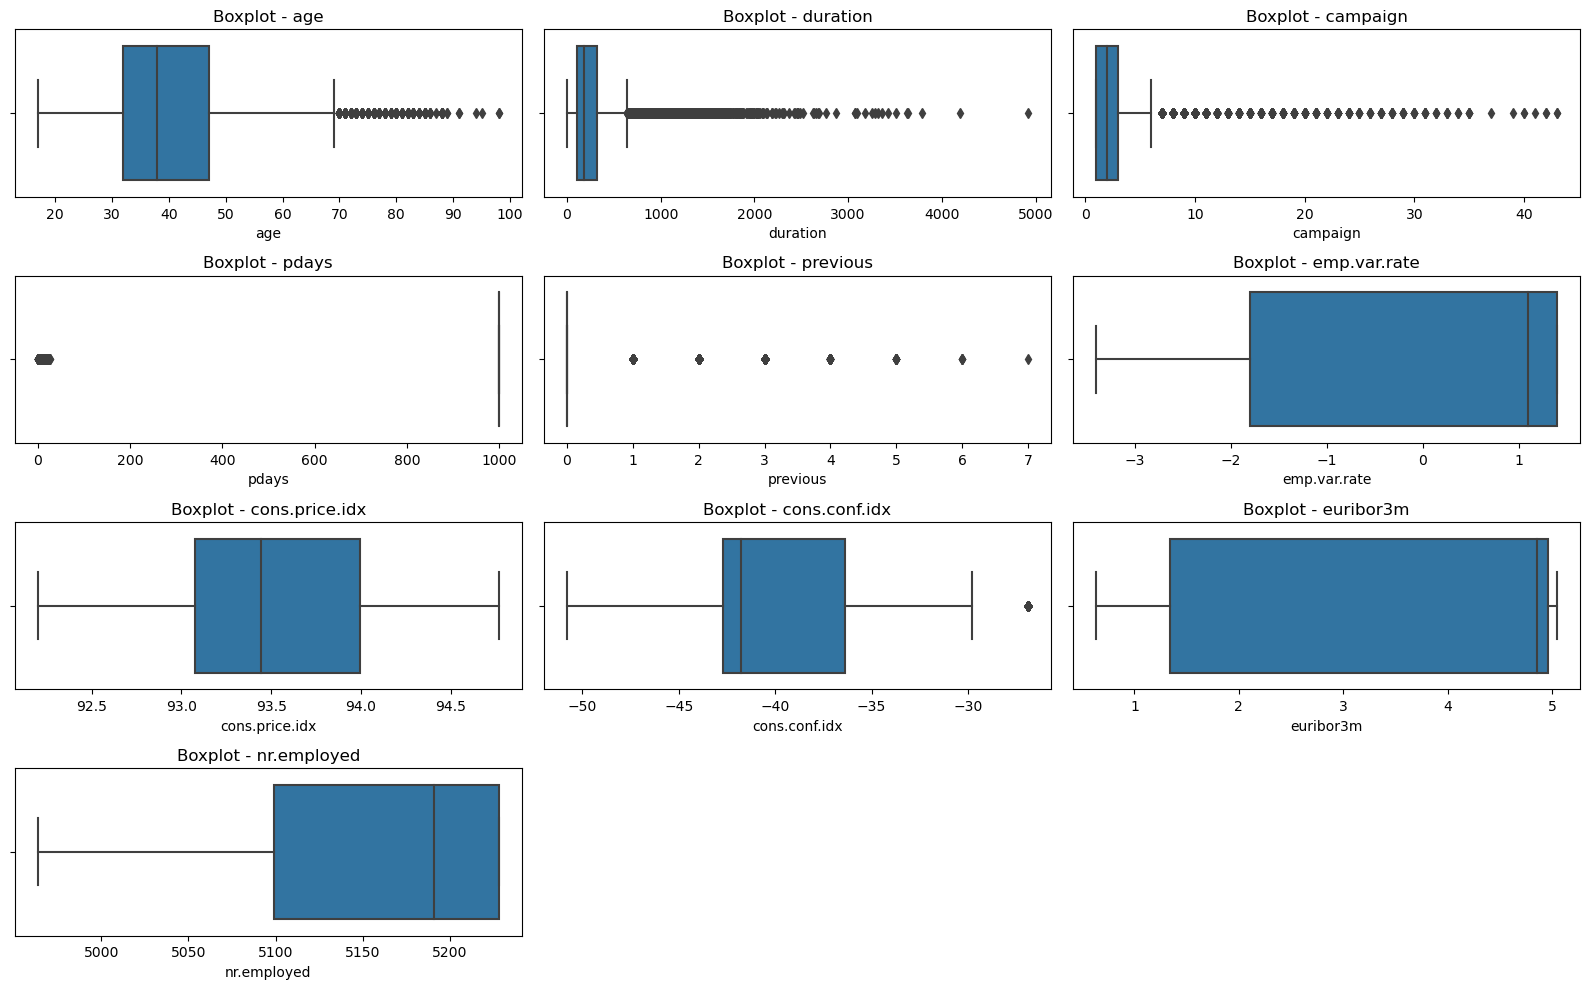

In [77]:
col_names = list(df.select_dtypes(include='number').columns)
iterPlt = 1
plt.figure(figsize=(16,10))

for col in col_names:
    plt.subplot(4,3, iterPlt)
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot - {col}')
    plt.tight_layout()

    iterPlt += 1

Outliers of Client description like `age` will not be deleted because the feature describes the client directly. Then, campaign description values such as `duration` and `campaign` are still reasonable due to the values outside of the IQR whiskers are still  clumped closely instead of certain extreme outliers. On the other hand, `pdays` and `previous` are integers describing days and number of times respectively which both have extreme skewness but the values causing them indicate special meanings. Value of 999 in `pdays` means the client was not previously contacted, while the value 0 in `previous` also means there was no prior contact. Lastly, the features related to socio-economic conditions have no extreme outliers and the values describe the actual condition when the campaign call was made for the specific client and are based on external data from the central bank of the Portuguese Republic statistical website.

## D. Data Analysis


In the analysis process, we only consider features from the customer to analyze their behavior. The aim of this analysis is to delve into the insights hidden within the banking dataset (from the customer side) and address some questions that will be answered during the analysis process, to help marketing departement having a better approach.

**Visualizing the Target**

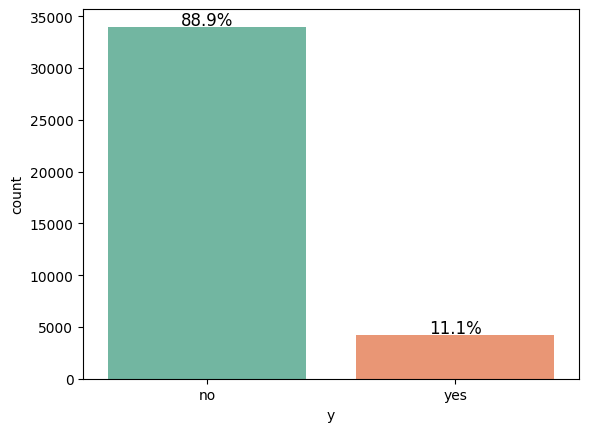

In [ ]:
sns.countplot(data=df, x='y',palette='Set2')
total = len(df)

# add percentage
# Menambahkan persentase di atas setiap batang
for p in plt.gca().patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height / total)
    plt.gca().annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                       textcoords='offset points')
    
plt.show()

Almost 90% of the custumor decided not to make any deposite

**check proportion of all catagorical feature towards the target**

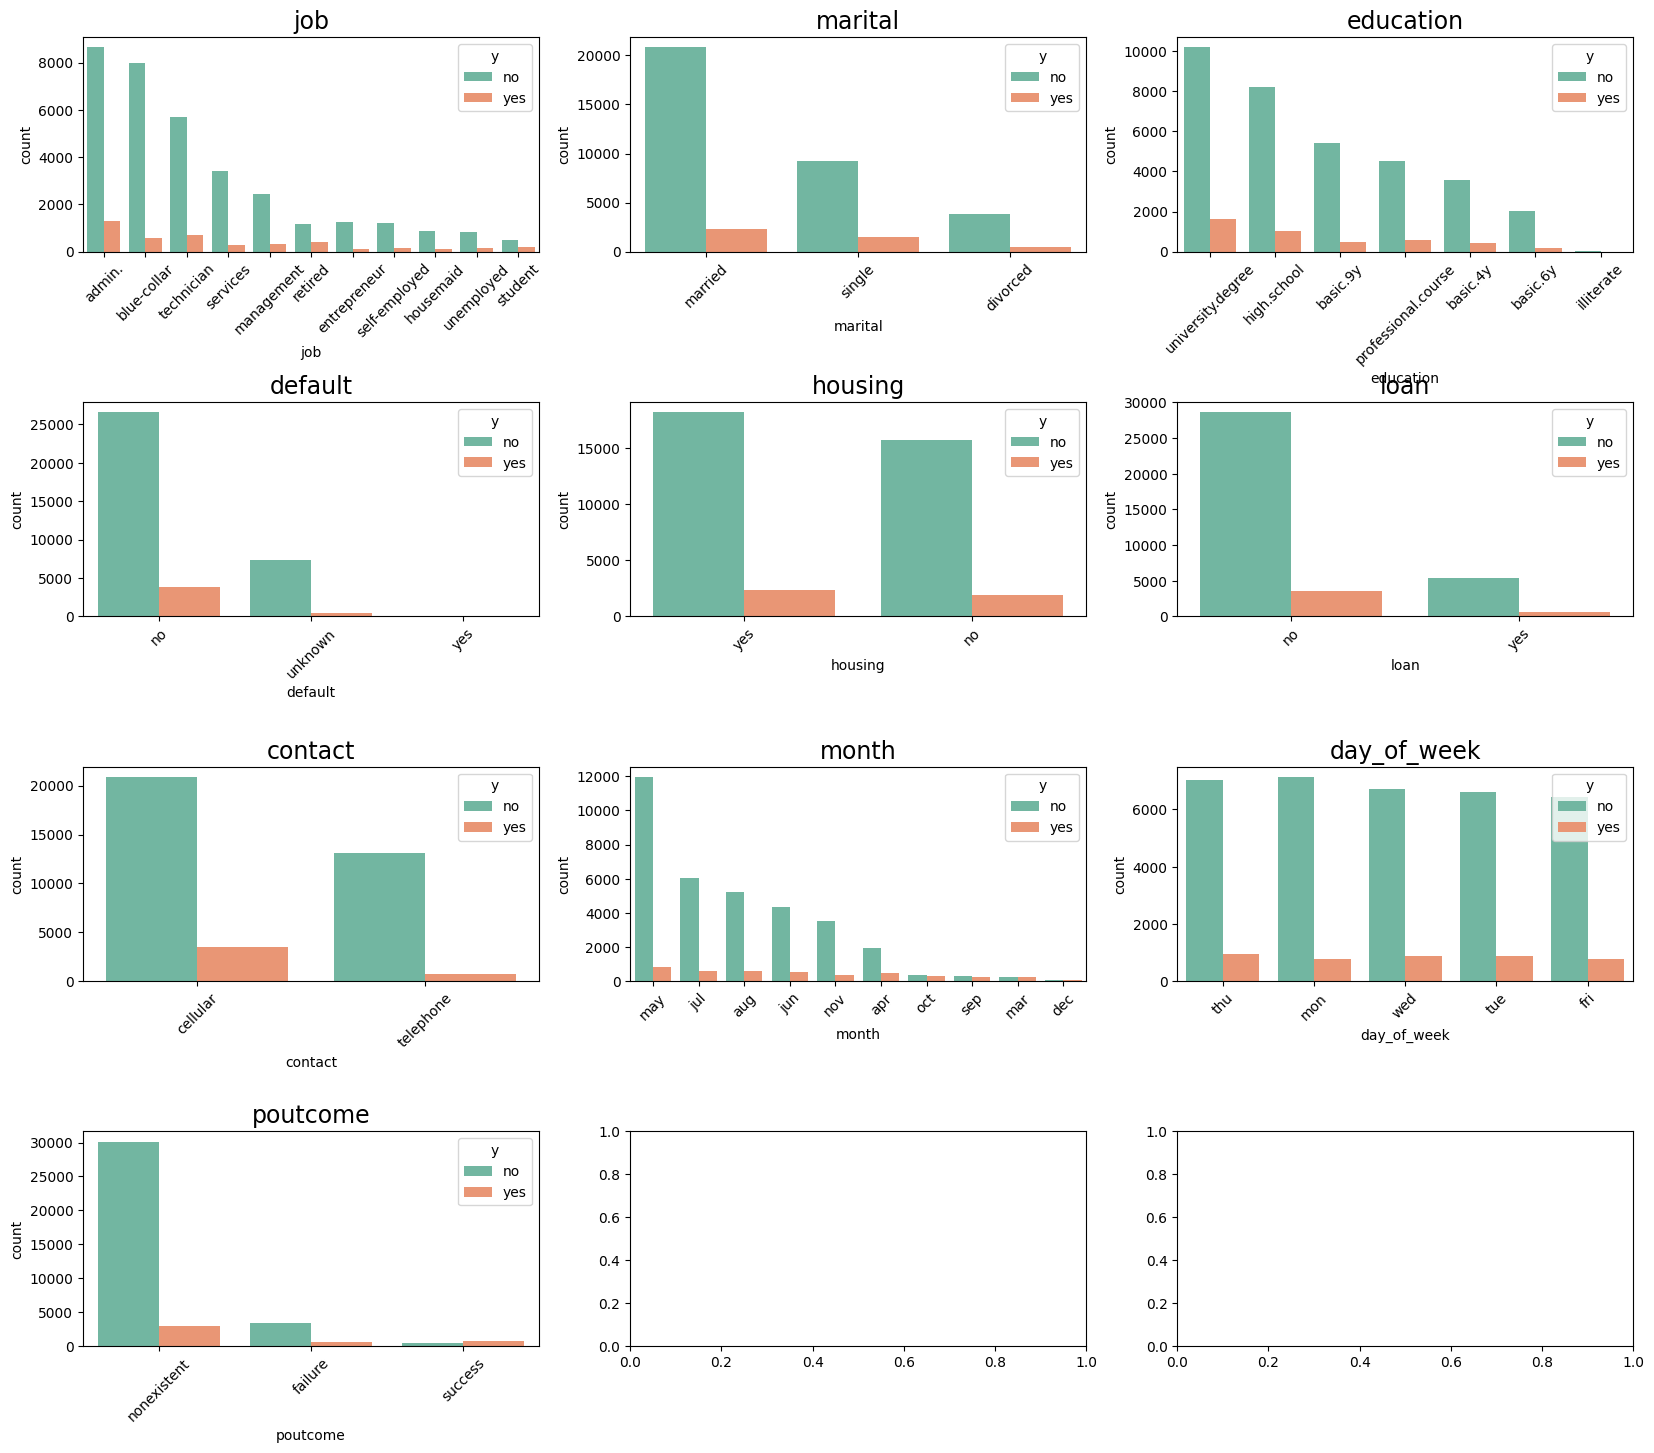

In [ ]:
catagorical_features = df.select_dtypes('object').columns.to_list()
catagorical_features = catagorical_features[:-1]

fig, ax = plt.subplots(4,3, figsize=(20,17))

catagorical_features = df.select_dtypes('object').columns.to_list()
catagorical_features = catagorical_features[:-1]

ax = ax.ravel()
position = 0

for i in catagorical_features:
    
    order = df[i].value_counts().index
    sns.countplot(data=df, x=i, ax=ax[position], hue='y', palette='Set2', order=order)
    ax[position].tick_params()
    ax[position].set_title(i, fontdict={'fontsize':17})
    ax[position].set_xticklabels(ax[position].get_xticklabels(), rotation=45)

    position += 1

plt.subplots_adjust(hspace=0.7)

plt.show()

**check the temporal data**

In [ ]:
df['month'] = pd.to_datetime(df['month'], format='%b').dt.month
df['month'] = df['month'].astype('int')

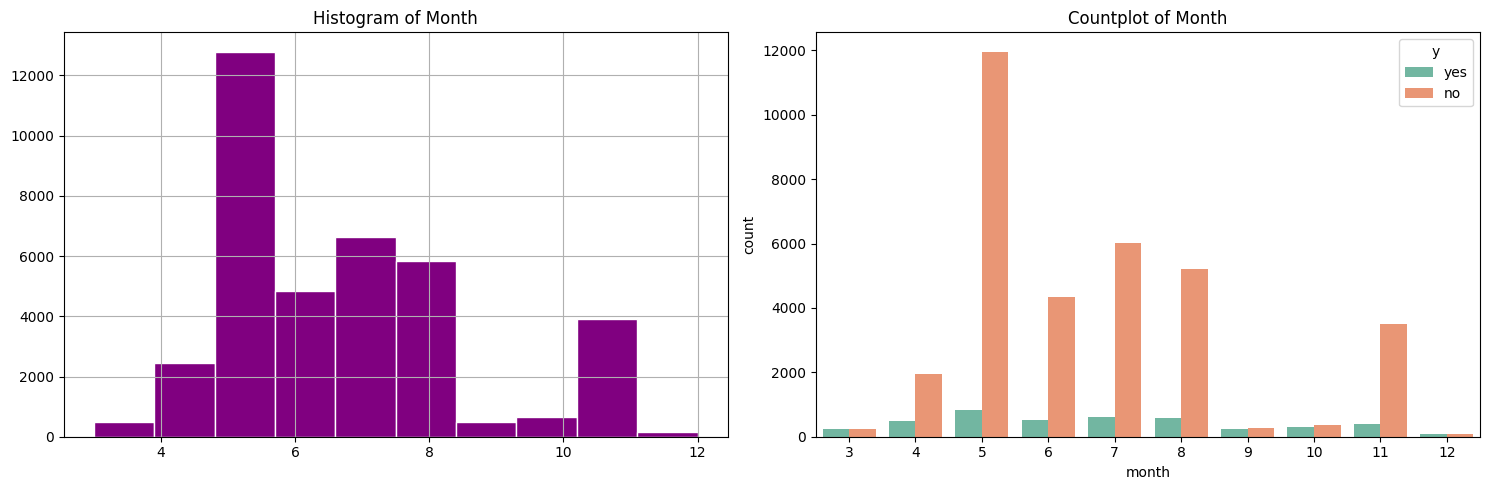

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

df.hist(column='month', edgecolor='white', color='purple', ax=ax[0]) # the first subplot in fig, ax.
ax[0].set_title('Histogram of Month')


sns.countplot(data=df, x='month', hue='y', palette='Set2', ax=ax[1])
ax[1].set_title('Countplot of Month')

plt.tight_layout()
plt.show()


In [ ]:
d = {'thu':4, 'mon':1, 'wed':3, 'tue':2, 'fri':5}
df['day_of_week'] = df['day_of_week'].map(d)
df['day_of_week'] = df['day_of_week'].astype('int')

In [ ]:
# calculate data each month dan persentase
count_data = df['month'].value_counts().sort_index()
total_count = count_data.sum()
percent_data = np.around(count_data / total_count * 100, 2)

yes_data = df[df['y'] == 'yes'].groupby('month').size().reindex(count_data.index, fill_value=0)
percent_yes = np.around(yes_data / count_data * 100, 2)

# Menyusun data ke dalam bentuk dataframe
table_data = pd.DataFrame({
    'Total Count': count_data,
    '% of Total': percent_data,
    'Yes Count': yes_data,
    '% of Yes': percent_yes
})

# Menampilkan dataframe
display(table_data)

,Total Count,% of Total,Yes Count,% of Yes
month,,,,
3,497,1.30,252,50.70
4,2435,6.37,486,19.96
5,12792,33.46,830,6.49
6,4846,12.67,511,10.54
7,6626,17.33,598,9.03
8,5820,15.22,596,10.24
9,502,1.31,225,44.82
10,658,1.72,297,45.14
11,3897,10.19,385,9.88


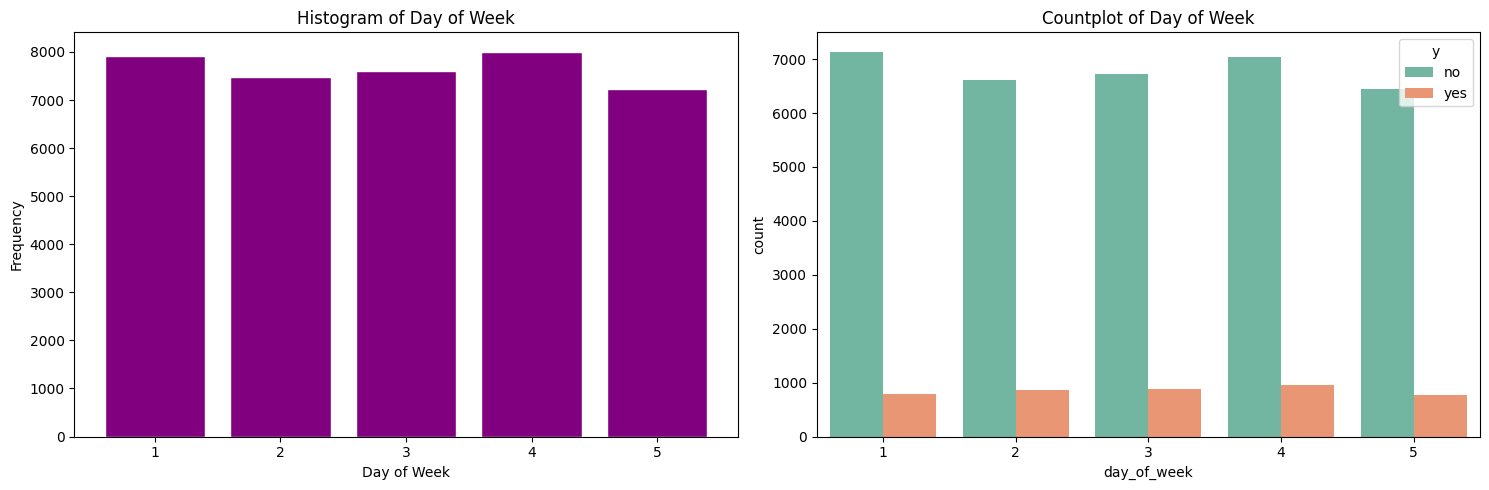

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
# Menghitung jumlah frekuensi untuk setiap kategori 'day_of_week'
counts = df['day_of_week'].value_counts().sort_index()

# Plot bar plot untuk kolom 'day_of_week'
ax[0].bar(counts.index, counts.values, edgecolor='white', color='purple')
ax[0].set_title('Histogram of Day of Week')
ax[0].set_xlabel('Day of Week')
ax[0].set_ylabel('Frequency')

# Menggambar countplot menggunakan seaborn
sns.countplot(data=df, x='day_of_week', hue='y', palette='Set2', ax=ax[1])
ax[1].set_title('Countplot of Day of Week')

plt.tight_layout()
plt.show()

Down bellow are some break out data from feature education

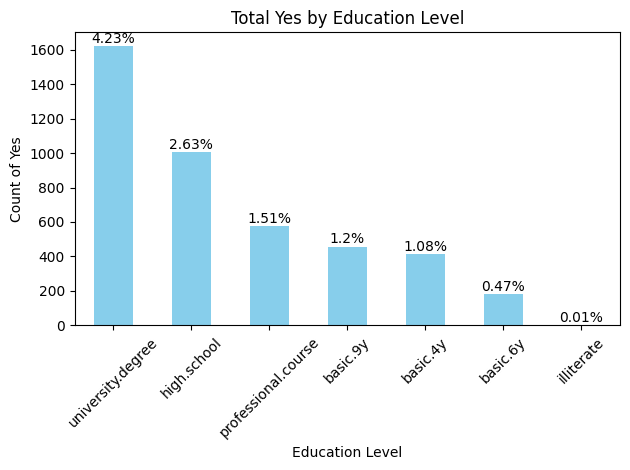

In [ ]:
yes_counts = df[df['y'] == 'yes'].groupby('education').size()
total_data = len(df)
#total_yes = yes_counts.sum()

# 'yes'percentage on each 'education' catagory
percent_yes = np.around((yes_counts / total_data) * 100, 2)
yes_counts_sorted = yes_counts.sort_values(ascending=False)

# Plotting bar plot
ax = yes_counts_sorted.plot(kind='bar', color='skyblue')
plt.xlabel('Education Level')
plt.ylabel('Count of Yes')
plt.title('Total Yes by Education Level')
plt.xticks(rotation=45)

# percentage label
for i, v in enumerate(yes_counts_sorted):
    ax.text(i, v + 1, f'{percent_yes[yes_counts_sorted.index[i]]}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

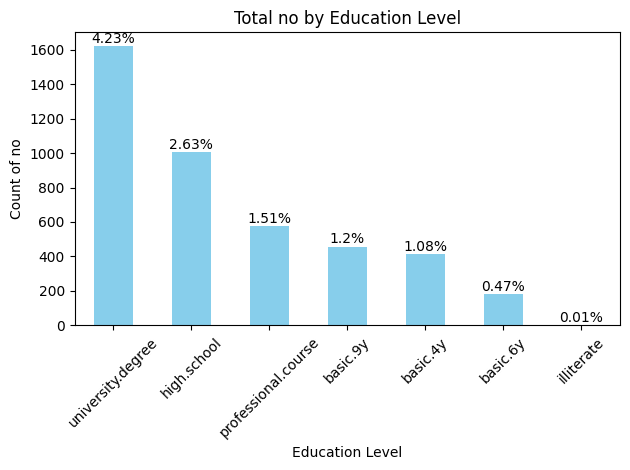

In [ ]:
no_counts = df[df['y'] == 'no'].groupby('education').size()
total_data = len(df)
#total_no = no_counts.sum()

# 'no'percentage on each 'education' catagory
percent_no = np.around((no_counts / total_data) * 100, 2)
no_counts_sorted = yes_counts.sort_values(ascending=False)

# Plotting bar plot
ax = no_counts_sorted.plot(kind='bar', color='skyblue')
plt.xlabel('Education Level')
plt.ylabel('Count of no')
plt.title('Total no by Education Level')
plt.xticks(rotation=45)

# percentage label
for i, v in enumerate(yes_counts_sorted):
    ax.text(i, v + 1, f'{percent_yes[yes_counts_sorted.index[i]]}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

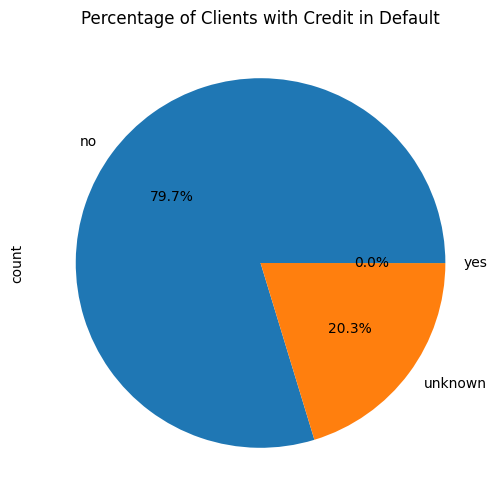

In [ ]:
plt.figure(figsize=(6, 6))
df['default'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Percentage of Clients with Credit in Default')
plt.show()

1. **What is the ratio between different `job` types in our dataset?**
   - The top 4 job types of our customers are employees in low to middle-level positions (marginal level).

2. **What is the distribution of marital statuses in our dataset?**
   - Almost 25,000 customers are married, while only 12,000 customers are single. However, when looking at the proportion of deposits, customers with single marital status tend to make deposits more frequently.

3. **What is the ratio of different education levels among our clients?**
   - The majority of customers have an education level ranging from 9 years up to university level. People from professional courses show a significant potential to make deposits, possibly due to their specific knowledge and goals.

4. **What percentage of clients have credit in default?**
   - Most customers have a credit history and have consistently repaid their loans successfully, with only 3 customers in default. This indicates a generally healthy financial condition, suggesting they can likely handle deposit terms if promoted effectively.

5. **What is the housing loan distribution among our clients?**
   - The number of customers with housing loans and those without is quite similar. The proportion of deposits made does not significantly differ between these groups, indicating that having a housing loan is not a major factor in influencing deposit decisions.

6. **How many clients have personal loans and how many don't?**
   - Unlike housing loans, many customers have personal loans.

7. **What is the most common contact communication type used for marketing?**
   - Since most customers use cellular phones, it is easier to approach them at appropriate times. The likelihood of making a deposit is higher when customers are contacted via cellular phone.

8. **How many clients were contacted in each month for marketing purposes?**
   - Nearly 12,000 customers were contacted in May, but this does not appear to be the optimal time. March seems to be the most effective month for making deposits, possibly because the summer break in Brazil ends in early February, and people start settling their finances in March.

9. **What is the distribution of the last contact day of the week?**
   - Effective marketing calls are typically made from Tuesday to Thursday, avoiding Monday (a stressful day) and Friday (when people prefer not to think about complicated matters). The differences are slight but notable.

**check the numerical data**

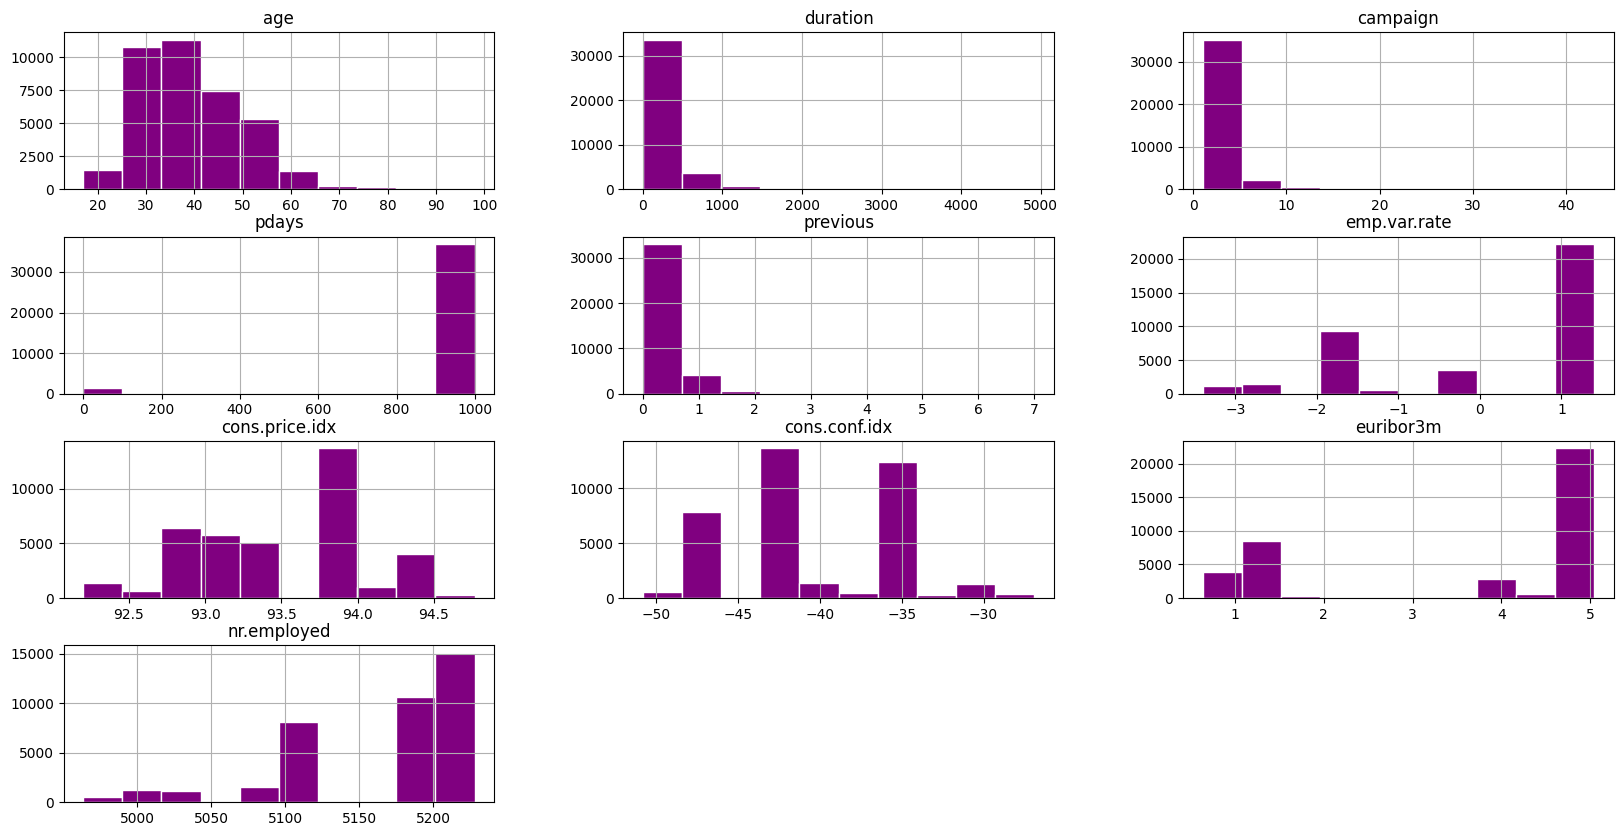

In [ ]:
numerical_features = df.select_dtypes(['int64', 'float64']).columns.to_list()

df.hist(figsize=(20,10), edgecolor='white', color='purple')
plt.show()

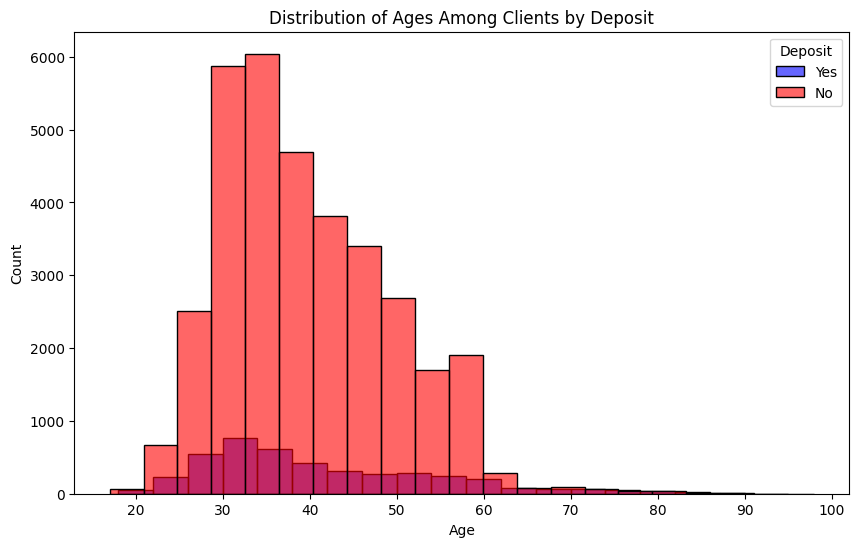

In [ ]:
plt.figure(figsize=(10, 6))

# Plot histogram for 'yes' values in 'y' column
sns.histplot(data=df[df['y'] == 'yes'], x='age', bins=20, color='blue', label='Yes', kde=False, stat="count", alpha=0.6)

# Plot histogram for 'no' values in 'y' column
sns.histplot(data=df[df['y'] == 'no'], x='age', bins=20, color='red', label='No', kde=False, stat="count", alpha=0.6)

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Ages Among Clients by Deposit')
plt.legend(title='Deposit')
plt.show()

Q1: 102.0
Q3: 319.0
IQR (Interquartile Range): 217.0
Lower Bound: -223.5
Upper Bound: 644.5
The first quartile (25th percentile) value of 'duration' for rows where 'y' is 'yes': 256.0


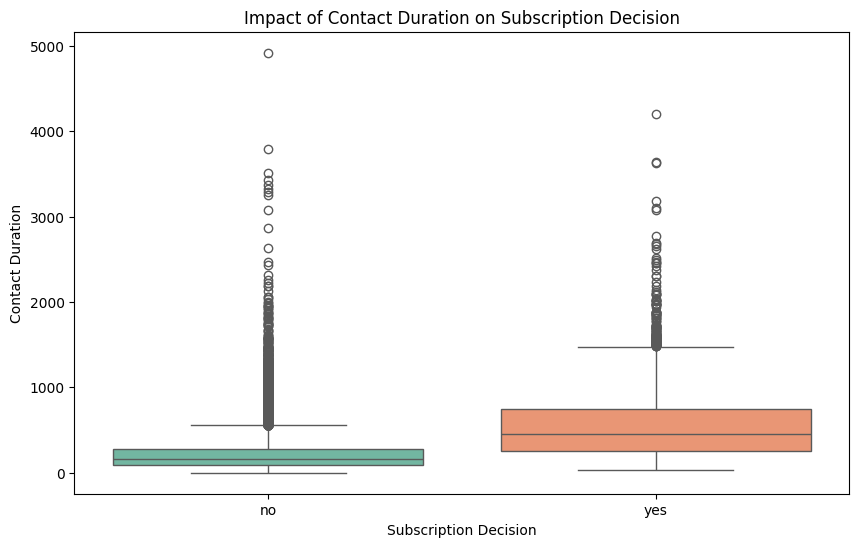

In [ ]:
# Menghitung Q1, Q3, dan IQR
Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1

# Menghitung Batas Bawah dan Batas Atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR (Interquartile Range): {IQR}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

# Get the 25th percentile (first quartile) value of 'duration' where 'y' is 'yes'
first_quartile_duration_yes = df[df['y'] == 'yes']['duration'].quantile(0.25)

print("The first quartile (25th percentile) value of 'duration' for rows where 'y' is 'yes':", first_quartile_duration_yes)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='y', y='duration', palette='Set2')
plt.xlabel('Subscription Decision')
plt.ylabel('Contact Duration')
plt.title('Impact of Contact Duration on Subscription Decision')
plt.show()


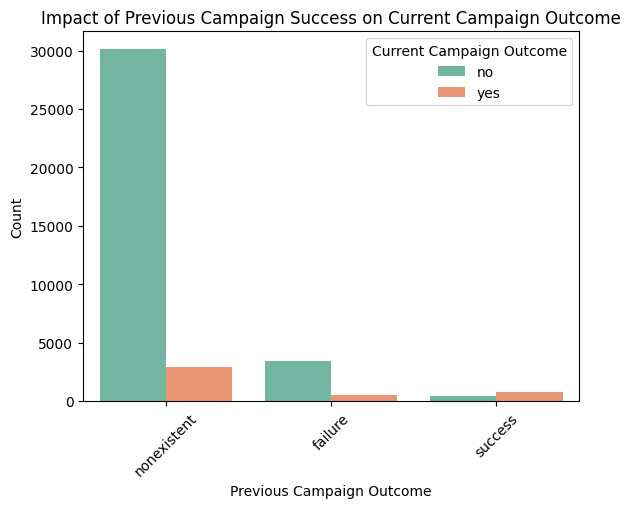

In [ ]:
sns.countplot(data=df, x='poutcome', hue='y', palette='Set2')
plt.xlabel('Previous Campaign Outcome')
plt.ylabel('Count')
plt.title('Impact of Previous Campaign Success on Current Campaign Outcome')
plt.xticks(rotation=45)
plt.legend(title='Current Campaign Outcome')
plt.show()

1. **Show the distribution of ages among the clients:**
   - Customers in their mid-20s, likely just starting their careers, to mid-40s, with some work and financial experience, tend not to have deposits due to uncertainties at their age, such as children's school needs, relocation, or job changes. In contrast, individuals in their 60s (full pension age in Brazil is 65 for men and 60 for women) tend to have more stable financial situations, possibly without housing loans or child-related expenses. They are more inclined to save money in term deposits.

2. **What is the average duration of the last contact during the campaign?**
   - The average duration is 246 seconds, or approximately 4.26 minutes. This represents the first quartile (Q1), indicating the bare minimum time to potentially secure a positive response from a customer. Further details can be explored in the duration analysis below.

3. **Does past campaign success affect the current campaign?**
   - 11.1% of the total customers have decided to make a deposit, indicating the influence of previous campaign successes on current outcomes. It can bee seeon also from the detail graph that compare previous campaign and the current one. From catagory nonexistance there is some successfull approaches.

4. **What impact does the duration of contact have on the subscription decision?**
   - Customers who engaged in conversations lasting more than 5 minutes showed a higher potential to make a deposit. It suggests that operators or marketers need to maintain the customer's interest for a longer duration to increase the likelihood of securing a deposit.

In [ ]:
# Moreover, we can see that 'duration' and 'campaign' distributions have most the values located in the first bin and then it descends. 
# To make this distributions a bit more useful for our machine learning model, we could transform them with the a log formula to make them more 'normal'. 
# An example below

# # log transformation
# Log_campaign = np.log(df['campaign'] + 1)
# Log_duration = np.log(df['duration'] + 1)

# # plot for Log_campaign
# plt.figure(figsize=(5, 3))
# plt.hist(Log_campaign, edgecolor='white', color='purple')
# plt.title('Log Campaign Histogram')
# plt.xlabel('Log Campaign')
# plt.ylabel('Frequency')
# plt.show()

# # plot for Log_duration
# plt.figure(figsize=(5, 3))
# plt.hist(Log_duration, edgecolor='white', color='purple')
# plt.title('Log Duration Histogram')
# plt.xlabel('Log Duration')
# plt.ylabel('Frequency')
# plt.show()

**Correlation**

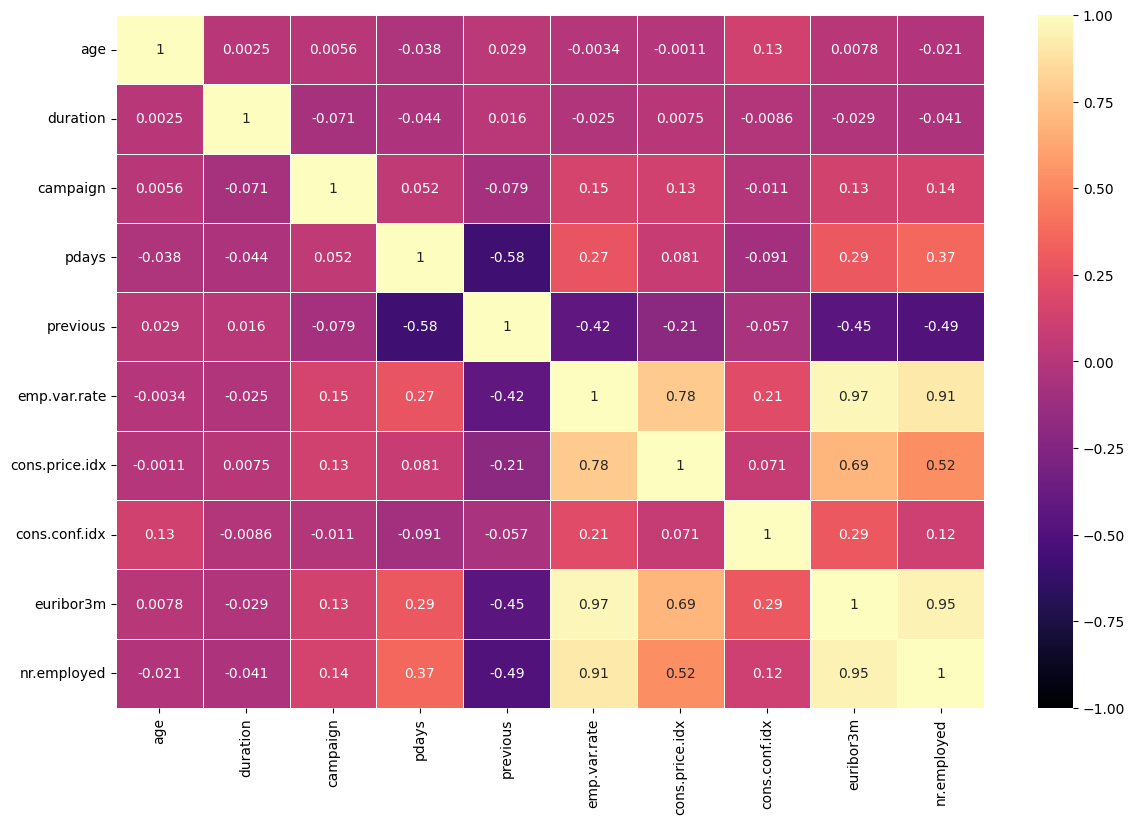

In [ ]:
fig, ax = plt.subplots(figsize=(14,9))
sns.heatmap(df[numerical_features].corr(), vmin=-1, vmax=1, cmap='magma', annot=True, linewidths=.5)
plt.show()

The high correlations are found only from feature from th bank side, such as employment variation rate that is indicated quarterly towards consumer price index, euribor 3 month rate, and number of employees. As wel as euribor 3 month rate, it has a strong correlation not only with employment variation rate but also with number of employees and consumer price index. Those are things that marketing team couldn't control from customer.

## E. Data Preparation 

### Checking Imbalance

In [14]:
df['y'].value_counts()

y
no     33977
yes     4257
Name: count, dtype: int64

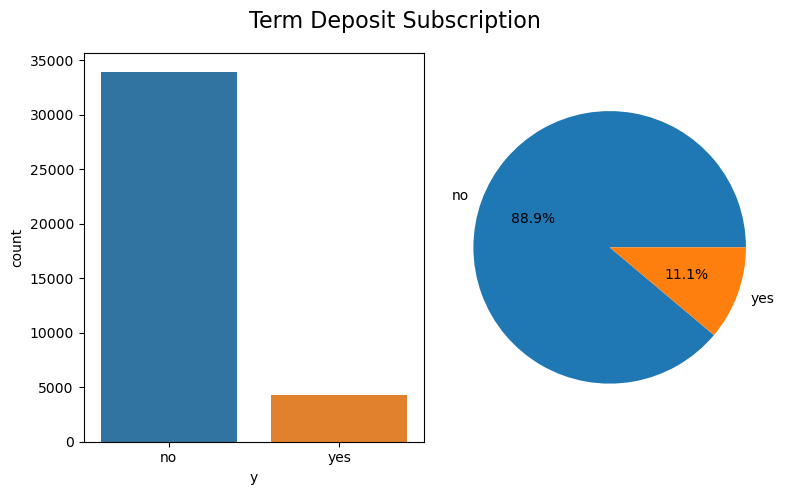

In [15]:
plt.figure(figsize=(8,5)).suptitle('Term Deposit Subscription', fontsize=16)

plt.subplot(1,2,1)
sns.countplot(data=df, x='y')

plt.subplot(1,2,2)
plt.pie(df['y'].value_counts(), labels=['no','yes'], autopct='%.1f%%')

plt.tight_layout()
plt.show()  

It is evident that the dataset is imbalanced based on the target variable for this classification task, which is Term Deposit Subscription. The proportion of Term Deposit Subscription as the minority class `yes` is only 11.1%, indicating that the dataset is moderately imbalanced (1-20% of the dataset) [1]. In order to address the imbalance, resampling techniques are typically used. Oversampling for positive class using **SMOTE** will be done to minimize information loss. Additionally, more balanced approach will also be compared using **SMOTEENN** which balances oversampling and undersampling in order to optimize trade-off between the two approach. Oversampling could lead to over-representation of the minority class, while undersampling could lead to information loss.

Source: 

[1] [Google Developers: Handling Imbalanced Data](https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data)

### Feature Engineering

**Feature**
1. `age`: Use RobustScaler to handle outliers and spread data.
2. `job`: Custom ordinal encoding due to many categories (>5) and having specific ranking based on financial stability and how high-paying the job is.
3. `marital`: One Hot Encoding for the 4 categorical values.
4. `education`: Custom ordinal encoding for the 8 categorical values which also describe education level which favors education level with more closely related to professional setting in business or industry.
5. `default`: One Hot Encoding for the 3 categorical values.
6. `housing`: One Hot Encoding for the 2 categorical values.
7. `loan`: One Hot Encoding for the 2 categorical values.
8. `contact`: One Hot Encoding for the 2 categorical values.
9. `month`: Cyclical nature of this feature could be represented by making sine and cosine of numerical representation of the month.
10. `day_of_week`: Cyclical nature of this feature could be represented by making sine and cosine of numerical representation of the day of the week.
11. `duration`: RobustScaler to handle outliers and spread data.
12. `campaign`: RobustScaler to handle outliers and spread data.
13. `pdays`: Binning is done to handle the value 999 that signify no prior contact had been made.
14. `previous`: RobustScaler to handle outliers and spread data.
15. `poutcome`: One Hot Encoding for the 3 categorical values.
16. `emp.var.rate`: RobustScaler to handle outliers and spread data.
17. `cons.price.idx`: RobustScaler to handle outliers and spread data.
18. `cons.conf.idx`: RobustScaler to handle outliers and spread data.
19. `euribor3m`: RobustScaler to handle outliers and spread data.
20. `nr.employed`: RobustScaler to handle outliers and spread data.

**Target**
1. `y`: binary encoding for 2 categorical value of target.

In [16]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Custom ordinal for job and education will be done without making a column transformer for them. This is done due to the customized nature of the mapping procedure. Considering practical application, custom mapping is done directly to the dataset and adding another column for the result as a new feature. 

#### Custom ordinal 1 - job

In [17]:
df['job'].unique()

array(['housemaid', 'services', 'admin.', 'technician', 'blue-collar',
       'retired', 'management', 'unemployed', 'self-employed',
       'entrepreneur', 'student'], dtype=object)

**Estimated Average Salaries for Job Types in Portugal :**

1. **Housemaid** : 
   - Average Salary of €10,000 - €12,000 annually.
   
2. **Services (e.g. Customer Service)** :
   - Average Salary of €22,335 annually.

3. **Admin.** :
   - Average Salary of €17,000 - €20,000 annually.

4. **Technician** :
   - Average Salary of €18,000 - €25,000 annually, depending on the specialization.

5. **Blue-Collar (e.g. Construction Worker)** :
   - Average Salary of €25,038 annually.

6. **Retired** :
   - Average Retirement Pension: Approximately €7,000 annually.

7. **Management (e.g. Manager, Business Partner)** :
   - Average Salary of €37,073 annually.

8. **Unemployed** :
   - For standard case of previous monthly salary of €900 who is single and has no children, monthly unemployment benefit of €626.85 is entitled with certain government requirements.

9. **Self-Employed** :
   - Varies widely, with typical earnings around €1,200 - €1,500 monthly, depending on the business.

10. **Entrepreneur (Small and Medium Enterprises - SME)** :
    - Average Revenue: Highly variable but can be around €20,000 - €50,000 annually for small businesses.

11. **Student (Part-time job)** :
    - Average Salary of €5.13 per hour, leading to approximately €410 monthly for part-time work.

Sources:
1. [SalaryExpert](https://www.salaryexpert.com/salary/job/)
2. [TimeCamp](https://www.timecamp.com/average-salary/portugal/)
3. [expatica](https://www.expatica.com/pt/working/employment-law/minimum-wage-in-portugal-927429/)
4. [salaryexplorer](https://www.salaryexplorer.com/average-salary-wage-comparison-portugal-c174)
5. [eportugal.gov](https://eportugal.gov.pt/en-GB/servicos/requerer-o-subsidio-de-desemprego)


| No. | Job Type                               | Monthly Compensation (€) | Stability    |
|-----|----------------------------------------|--------------------------|--------------|
| 1   | Housemaid                              | €833 - €1,000             | Stable       |
| 2   | Services (e.g. Customer Service)       | €1,861                    | Stable       |
| 3   | Admin.                                 | €1,417 - €1,667           | Stable       |
| 4   | Technician                             | €1,500 - €2,083           | Stable       |
| 5   | Blue-Collar (e.g. Construction Worker) | €2,086                    | Stable       |
| 6   | Retired                                | €583                      | Stable       |
| 7   | Management (e.g. Manager, Business Partner) | €3,089            | Stable       |
| 8   | Unemployed                             | €626.85                   | Unstable     |
| 9   | Self-Employed                          | €1,200 - €1,500           | Moderate     |
| 10  | Entrepreneur (Small and Medium Enterprises - SME) | €1,667 - €4,167 | Moderate     |
| 11  | Student (Part-time job)                | Approx. €410              | Unstable     |

In [18]:
dataSalary = {
    "job": [
        "housemaid", "services", "admin.",
        "technician", "blue-collar", "retired",
        "management", "unemployed", "self-employed",
        "entrepreneur", "student"
    ],
    "compensation": [
        (833 + 1000) / 2, 1861, (1417 + 1667) / 2, (1500 + 2083) / 2, 2086, 583, 3089, 626.85, (1200 + 1500) / 2, (1667 + 4167) / 2, 410
    ],
    "stability": [
        "stable", "stable", "stable", "stable", "stable", "stable",
        "stable", "unstable", "moderate", "moderate", "unstable"
    ]
}

# Create DataFrame
dfSalary = pd.DataFrame(dataSalary)
display(dfSalary)

# Encode stability as ordinal values
stability_mapping = {
    'stable': 1,
    'moderate': 2,
    'unstable': 3
}
dfSalary['stability'] = dfSalary['stability'].map(stability_mapping)

# Round to closest 500 hundreds multiple
dfSalary['compensation'] = dfSalary['compensation'].apply(lambda x: round(x / 500) * 500)

# Sort by compensation and stability
print('Rounded and Sorted compensation with encoded stability:')
dfSalarySorted = dfSalary.sort_values(by=['compensation','stability'], ascending=[True,True])
display(dfSalarySorted)

,job,compensation,stability
0,housemaid,916.50,stable
1,services,1861.00,stable
2,admin.,1542.00,stable
3,technician,1791.50,stable
4,blue-collar,2086.00,stable
5,retired,583.00,stable
6,management,3089.00,stable
7,unemployed,626.85,unstable
8,self-employed,1350.00,moderate
9,entrepreneur,2917.00,moderate


Rounded and Sorted compensation with encoded stability:


,job,compensation,stability
5,retired,500,1
7,unemployed,500,3
10,student,500,3
0,housemaid,1000,1
2,admin.,1500,1
8,self-employed,1500,2
1,services,2000,1
3,technician,2000,1
4,blue-collar,2000,1
6,management,3000,1


In [19]:
# Initialize rank tracking
rank = 0
current_comp_stab = None
ordinal_rank = []

# Assign ordinal rank based on sorted order and same values
for i, row in dfSalarySorted.iterrows():
    if (row['compensation'], row['stability']) != current_comp_stab:
        rank += 1
        current_comp_stab = (row['compensation'], row['stability'])
    ordinal_rank.append(rank)

# Add ordinal rank to the DataFrame
dfSalarySorted['ordinal'] = ordinal_rank
dfSalarySorted

,job,compensation,stability,ordinal
5,retired,500,1,1
7,unemployed,500,3,2
10,student,500,3,2
0,housemaid,1000,1,3
2,admin.,1500,1,4
8,self-employed,1500,2,5
1,services,2000,1,6
3,technician,2000,1,6
4,blue-collar,2000,1,6
6,management,3000,1,7


In [20]:
# Dropping the compensation and stability and making it into dictionary
dictSalary = dfSalarySorted.drop(columns=["compensation","stability"]).to_dict(orient='list')

# Convert to ordinal mapping dictionary
salary_ordinal_mapping = {job: ordinal for job, ordinal in zip(dictSalary['job'], dictSalary['ordinal'])}
salary_ordinal_mapping

{'retired': 1,
 'unemployed': 2,
 'student': 2,
 'housemaid': 3,
 'admin.': 4,
 'self-employed': 5,
 'services': 6,
 'technician': 6,
 'blue-collar': 6,
 'management': 7,
 'entrepreneur': 8}

In [21]:
df['job_ordinal'] = df['job'].map(salary_ordinal_mapping)

#### Custom ordinal 2 - education

In [22]:
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'university.degree', 'illiterate'],
      dtype=object)

The ordinal representation would be determined based on the education level and its relation to **professional expertise**, **business**, or **industry**.

In [23]:
dfEdu = pd.DataFrame({
    'education': list(df['education'].unique()),
    'ordinal': [2,5,3,4,7,6,1]
})
dfEdu.sort_values(by=['ordinal'], ascending=[True])

,education,ordinal
6,illiterate,1
0,basic.4y,2
2,basic.6y,3
3,basic.9y,4
1,high.school,5
5,university.degree,6
4,professional.course,7


In [24]:
edu_ordinal_mapping = {edu: ordinal for edu, ordinal in zip(dfEdu['education'], dfEdu['ordinal'])}
edu_ordinal_mapping

{'basic.4y': 2,
 'high.school': 5,
 'basic.6y': 3,
 'basic.9y': 4,
 'professional.course': 7,
 'university.degree': 6,
 'illiterate': 1}

In [25]:
df['education_ordinal'] = df['education'].map(edu_ordinal_mapping)

#### Cyclical

1. month


In [26]:
dfMonth = pd.DataFrame({
    'month': ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
})

# Convert month names to numerical values
month_map = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
dfMonth['month_num'] = dfMonth['month'].map(month_map)

# Apply sine and cosine transformations
dfMonth['month_sin'] = np.sin(2 * np.pi * dfMonth['month_num'] / 12)
dfMonth['month_cos'] = np.cos(2 * np.pi * dfMonth['month_num'] / 12)

# Drop the original month_num column if not needed
dfMonth.drop(columns=['month_num'])

,month,month_sin,month_cos
0,jan,5.000000e-01,8.660254e-01
1,feb,8.660254e-01,5.000000e-01
2,mar,1.000000e+00,6.123234e-17
3,apr,8.660254e-01,-5.000000e-01
4,may,5.000000e-01,-8.660254e-01
5,jun,1.224647e-16,-1.000000e+00
6,jul,-5.000000e-01,-8.660254e-01
7,aug,-8.660254e-01,-5.000000e-01
8,sep,-1.000000e+00,-1.836970e-16
9,oct,-8.660254e-01,5.000000e-01


In [27]:
from sklearn.base import BaseEstimator, TransformerMixin

2. day_of_week

In [28]:
dfWeek = pd.DataFrame({
    'day': ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
})

# Convert day names to numerical values
day_map = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5, 'sat': 6, 'sun': 7}
dfWeek['day_num'] = dfWeek['day'].map(day_map)

# Apply sine and cosine transformations
dfWeek['day_sin'] = np.sin(2 * np.pi * dfWeek['day_num'] / 7)
dfWeek['day_cos'] = np.cos(2 * np.pi * dfWeek['day_num'] / 7)

# Drop the original day_num column if not needed
dfWeek.drop(columns=['day_num'])

,day,day_sin,day_cos
0,mon,7.818315e-01,0.623490
1,tue,9.749279e-01,-0.222521
2,wed,4.338837e-01,-0.900969
3,thu,-4.338837e-01,-0.900969
4,fri,-9.749279e-01,-0.222521
5,sat,-7.818315e-01,0.623490
6,sun,-2.449294e-16,1.000000


3. Mapping ordinal of `month` and `day_of_week`

In [29]:
month_map = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
df['month_ordinal'] = df['month'].map(month_map)

day_map = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5, 'sat': 6, 'sun': 7}
df['day_of_week_ordinal'] = df['day_of_week'].map(day_map)

4. Cyclical Transformer

In [30]:
class CyclicalTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, period):
        self.period = period

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X = X.copy()
        X_sin = np.sin(2 * np.pi * X / self.period)
        X_cos = np.cos(2 * np.pi * X / self.period)
        return np.hstack([X_sin, X_cos])
    
    def get_feature_names_out(self, input_features=None):
        if input_features is None:
            input_features = [f'feature_{i}' for i in range(self.period)]
        feature_names = []
        for feature in input_features:
            feature_names.append(f'{feature}_sin')
            feature_names.append(f'{feature}_cos')
        return feature_names


In [31]:
# Create an instance of the transformer for a yearly period (12 months)
month_transformer = CyclicalTransformer(period=12)
month_transformer

CyclicalTransformer(period=12)

In [32]:
# Create an instance of the transformer for a weekly period (7 days)
day_week_transformer = CyclicalTransformer(period=7)
day_week_transformer

CyclicalTransformer(period=7)

#### Binning

1. duration
2. pdays

Text(0.5, 0.98, 'Distribution of duration and pdays')

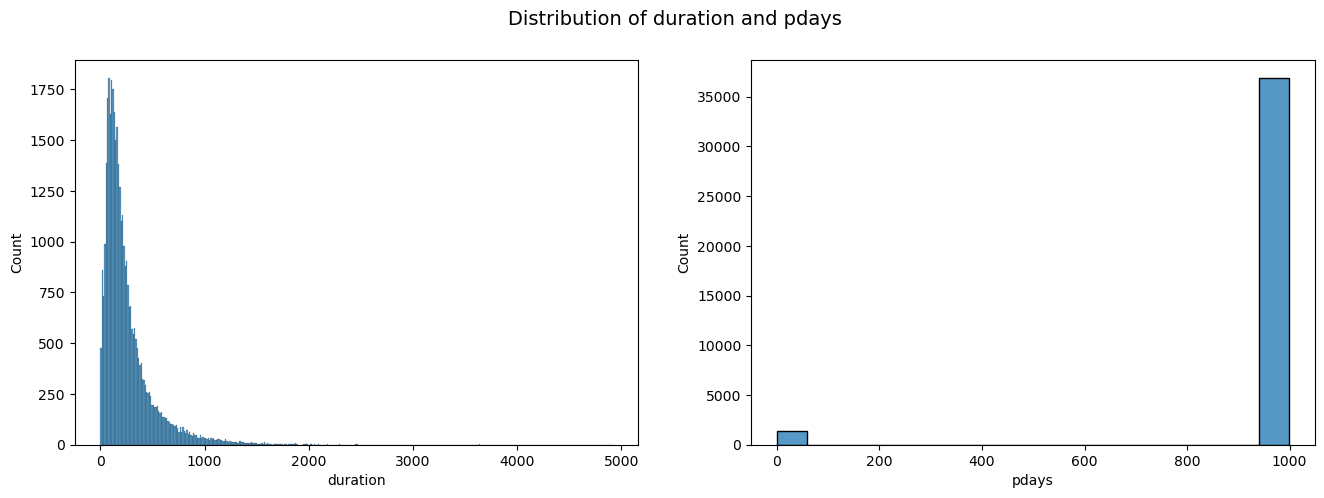

In [33]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.histplot(data=df, x='duration')
plt.subplot(1,2,2)
sns.histplot(data=df, x='pdays')

plt.suptitle('Distribution of duration and pdays', size= 14)

In [34]:
df.describe()[['duration','pdays']]

,duration,pdays
count,38234.000000,38234.000000
mean,258.236282,963.521447
std,259.818894,184.320782
min,0.000000,0.000000
25%,102.000000,999.000000
50%,180.000000,999.000000
75%,319.000000,999.000000
max,4918.000000,999.000000


In [35]:
a = set(df[df['pdays'] < 900]['pdays'])
print(a)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 25, 26, 27}


Binning with custom bin edges. 

For `duration` 0-300 s (0-5 mins), 300-1800 s (5-30 mins), >30 mins.

For `pdays` 0-7 days, 1-2 weeks, >2 weeks.


In [36]:
bins1 = pd.cut(df['duration'], bins=[-1, 300, 1800, df['duration'].max()], labels=False)
bins2 = pd.cut(df['pdays'], bins=[-1, 7, 14, df['pdays'].max()], labels=False) # -1 is only for including 0

In [37]:
display(bins1.value_counts(), bins2.value_counts())

duration
0    27837
1    10301
2       96
Name: count, dtype: int64

pdays
2    36920
0     1071
1      243
Name: count, dtype: int64

Hasil binning sudah ordinal

In [38]:
df['duration_bin'] = bins1
df['pdays_bin'] = bins2

#### Encoding target to 0 and 1 from no and yes

Instead of using column transformer, this is done the same reason as the custom ordinal encoding done before. Due to the mapping nature of this case could be custom string into certain value, this is done considering the practicality of this procedure.

In [39]:
y_map = {'yes': 1, 'no': 0 }
df['y_binary'] = df['y'].map(y_map)

### Preparation of **x** and **y** data

### Transformers

Check current df

In [40]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_ordinal,education_ordinal,month_ordinal,day_of_week_ordinal,duration_bin,pdays_bin,y_binary
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,3,2,5,1,0,2,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,6,5,5,1,0,2,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,6,5,5,1,0,2,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,4,3,5,1,0,2,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,6,5,5,1,1,2,0


In [41]:
df_XY = df[['age','job_ordinal','marital','education_ordinal','default',
        'housing','loan','contact','month_ordinal','day_of_week_ordinal','duration_bin',
        'campaign','pdays_bin','previous','poutcome','emp.var.rate',
        'cons.price.idx','cons.conf.idx','euribor3m','nr.employed','y_binary']]

In [42]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder

In [43]:
# Transformer for features
transformer = ColumnTransformer([
    ('scaler', RobustScaler(), 
    ['age','campaign','previous','emp.var.rate','cons.price.idx', 
    'cons.conf.idx','euribor3m','nr.employed']),

    ('onehot', OneHotEncoder(drop='first'), 
    ['marital','default','housing','loan','contact','poutcome']),

    ('cyclicalDayWeek', CyclicalTransformer(period=7),
    ['day_of_week_ordinal']),

    ('cyclicalMonth', CyclicalTransformer(period=12), 
    ['month_ordinal'])
], remainder='passthrough')


In [44]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('scaler', RobustScaler(),
                                 ['age', 'campaign', 'previous', 'emp.var.rate',
                                  'cons.price.idx', 'cons.conf.idx',
                                  'euribor3m', 'nr.employed']),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['marital', 'default', 'housing', 'loan',
                                  'contact', 'poutcome']),
                                ('cyclicalDayWeek',
                                 CyclicalTransformer(period=7),
                                 ['day_of_week_ordinal']),
                                ('cyclicalMonth',
                                 CyclicalTransformer(period=12),
                                 ['month_ordinal'])])

### Data Splitting

In [45]:
x = df_XY.drop(columns=['y_binary'])
y = df_XY['y_binary']

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split( x, y, stratify=y, test_size=0.2, random_state=2024)

In [47]:
df_train = pd.DataFrame(transformer.fit_transform(x_train), columns=transformer.get_feature_names_out())
df_train['y'] = y_train
df_train.head()

,scaler__age,scaler__campaign,scaler__previous,scaler__emp.var.rate,scaler__cons.price.idx,scaler__cons.conf.idx,scaler__euribor3m,scaler__nr.employed,onehot__marital_married,onehot__marital_single,onehot__default_unknown,onehot__default_yes,onehot__housing_yes,onehot__loan_yes,onehot__contact_telephone,onehot__poutcome_nonexistent,onehot__poutcome_success,cyclicalDayWeek__day_of_week_ordinal_sin,cyclicalDayWeek__day_of_week_ordinal_cos,cyclicalMonth__month_ordinal_sin,cyclicalMonth__month_ordinal_cos,remainder__job_ordinal,remainder__education_ordinal,remainder__duration_bin,remainder__pdays_bin,y
0,-0.266667,1.0,0.0,0.09375,0.515778,-0.142857,0.027647,0.287597,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.433884,-0.900969,-5.000000e-01,-0.866025,4.0,5.0,0.0,2.0,0.0
1,0.533333,-0.5,2.0,-0.87500,0.838955,0.238095,-1.122477,-1.545736,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.974928,-0.222521,-5.000000e-01,-0.866025,4.0,5.0,1.0,1.0,0.0
2,0.333333,2.0,0.0,-1.25000,-0.523395,0.158730,-0.988665,-0.889922,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.781831,0.623490,1.224647e-16,-1.000000,6.0,3.0,1.0,2.0,0.0
3,0.466667,-0.5,1.0,-1.25000,-1.352557,1.650794,-1.099806,-0.889922,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.433884,-0.900969,-8.660254e-01,-0.500000,6.0,4.0,0.0,0.0,0.0
4,-0.266667,1.5,0.0,0.09375,0.515778,-0.142857,0.029030,0.287597,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.433884,-0.900969,-5.000000e-01,-0.866025,4.0,5.0,1.0,2.0,0.0


### Correlation

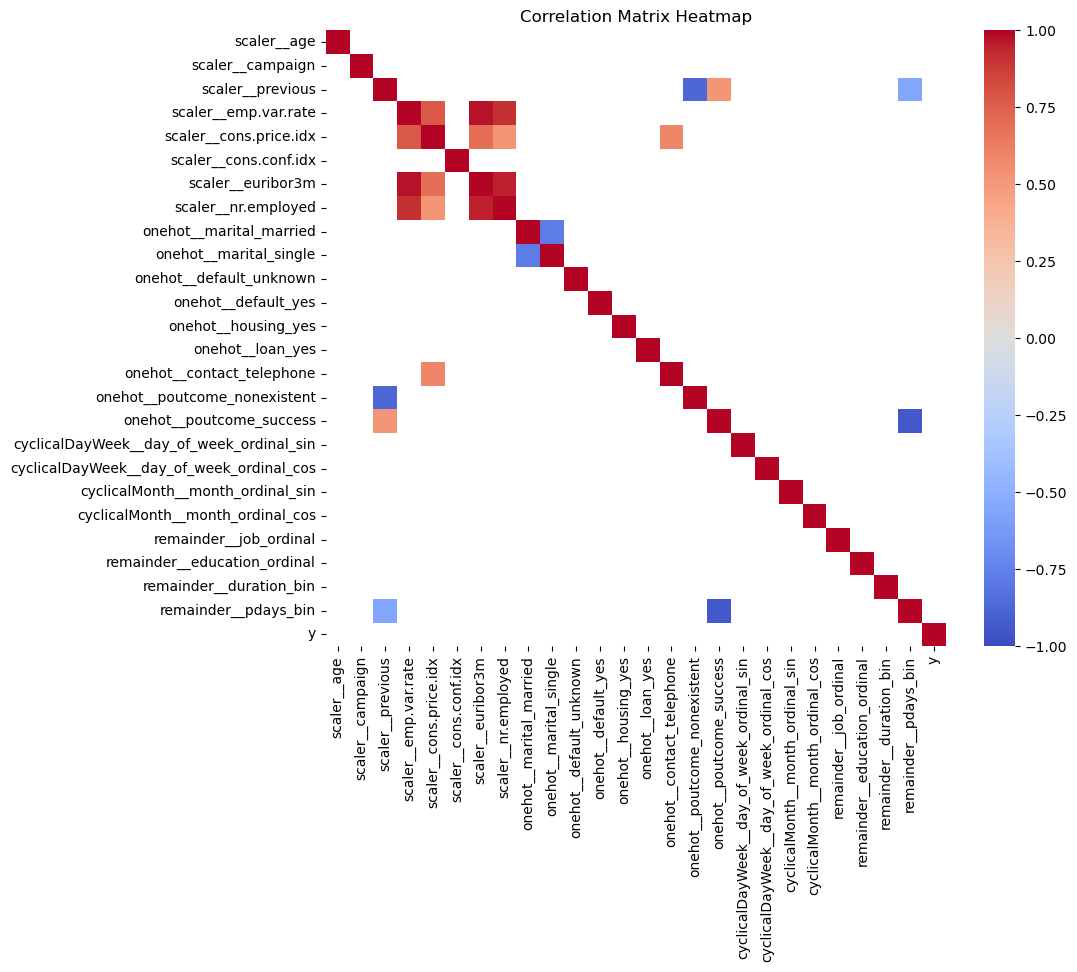

In [48]:
plt.figure(figsize=(10, 8))
corr_threshold = 0.5
correlation_matrix = df_train.corr()
sns.heatmap(correlation_matrix[correlation_matrix.abs() > corr_threshold], annot=False, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

Insight :
1. No features with high correlation (> 0.50 or < -0.50) with target label y 
2. Some feature pairs are highly correlated (> 0.50 or < -0.50)

Tabulating the correlation matrix

In [49]:
pair_row = []
pair_col = []
corr_values = []

for col in correlation_matrix.columns:
    for row in correlation_matrix.index:
        # Exclude self-correlation
        if col != row:  
            pair_row.append(f"{col}")
            pair_col.append(f"{row}")
            corr_values.append(correlation_matrix.loc[row, col])

df_corr = pd.DataFrame({'pair_row': pair_row, 'pair_col': pair_col, 'corr_value': corr_values})
df_corr.sort_values(by='corr_value',ascending=False,inplace=True)

# Delete duplicate pairs
df_corr['pair'] = df_corr.apply(lambda x: tuple(sorted([x['pair_row'], x['pair_col']])), axis=1)
df_corr_unique = df_corr.drop_duplicates(subset='pair').drop(columns=['pair'])

# sort based on absolute value
df_corr_sort = df_corr_unique.reindex(df_corr_unique['corr_value'].abs().sort_values(ascending=False).index)

In [50]:
print(f"Feature pairs with absolute corr_value > 0.50 : {len(df_corr_sort[df_corr_sort['corr_value'].abs() > corr_threshold])} entries")
df_corr_sort_thresh = df_corr_sort[df_corr_sort['corr_value'].abs() > corr_threshold]
df_corr_sort_thresh

Feature pairs with absolute corr_value > 0.50 : 12 entries


,pair_row,pair_col,corr_value
153,scaler__euribor3m,scaler__emp.var.rate,0.972392
156,scaler__euribor3m,scaler__nr.employed,0.945367
423,onehot__poutcome_success,remainder__pdays_bin,-0.937599
178,scaler__nr.employed,scaler__emp.var.rate,0.907782
377,onehot__poutcome_nonexistent,scaler__previous,-0.882030
78,scaler__emp.var.rate,scaler__cons.price.idx,0.775421
208,onehot__marital_married,onehot__marital_single,-0.775012
154,scaler__euribor3m,scaler__cons.price.idx,0.689610
354,onehot__contact_telephone,scaler__cons.price.idx,0.591965
602,remainder__pdays_bin,scaler__previous,-0.558206


Insight :
- Several feature pairs have high correlation, thus indicate possibility of multicollinearity

### Multicollinearity

The existence of high correlation between independent variable is called
**multicollinearity**. Usually, multicollinearity is most detrimental in regression problems using linear models to the accuracy, stability, and interpretability. But, this doesn't mean there is no effect to classification problems. The effects of multicollinearity in classification problems exist in linear models to some degree and even in non-linear models there are effects to the interpretability of the model, specifically regarding **feature importance** within [1].

For example :
* Within Decision Tree Classifier, the Feature Importance becomes quite unreliable. The tree can choose any of the collinear Features to create splits and hence the two Features divide the share of Importance [1,2,3].

The most widely used test for multicollinearity is the Variation Inflation Factor (VIF) or its reciprocal Tolerance (TOL) [4]. VIF is the relative measure of the increase in the variance in standard error of beta coefficient because of collinearity. Even though this utilizes regression coefficients, VIF value represents the multicollinearity of the features. Therefore, VIF value could still be used in our case. 

Reference :
1. Morris, J. D., & Lieberman, M. G. (2014). The Precise Effect of Multicollinearity on Classification Prediction. Multiple Linear Regression Viewpoints, 40(1):5–10. https://www.researchgate.net/publication/336561703_The_Precise_Effect_of_Multicollinearity_on_Classification_Prediction.
2. Data Science StackExchange. (2020, October 10). Is multicollinearity a problem also in classification?. Data Science Stack Exchange. https://datascience.stackexchange.com/questions/82829/is-multicollinearity-a-problem-also-in-classification.
3. Data Science StackExchange. (2015, March 13). Won't highly-correlated variables in random forest distort accuracy and feature-selection?. Data Science Stack Exchange. https://datascience.stackexchange.com/questions/82829/is-multicollinearity-a-problem-also-in-classification. https://stats.stackexchange.com/questions/141619/wont-highly-correlated-variables-in-random-forest-distort-accuracy-and-feature.
4. Neter, J.; Kutner, M.H.; Nachtsheim, C.J.; Wasserman, W. Applied Linear Statistical Models; WCB McGraw-Hill: New York, NY, USA, 1996.


In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [52]:
df_x_train = df_train.drop(columns=['y'])

vif_data = pd.DataFrame()
vif_data["feature"] = transformer.get_feature_names_out()
vif_data["VIF"] = [variance_inflation_factor(df_x_train, i) for i in range(df_x_train.shape[1])]

In [53]:
vif_data.sort_values(by='VIF',ascending=False, inplace=True)
vif_data

,feature,VIF
6,scaler__euribor3m,180.127716
3,scaler__emp.var.rate,68.208382
24,remainder__pdays_bin,64.944420
7,scaler__nr.employed,50.686188
15,onehot__poutcome_nonexistent,30.005009
22,remainder__education_ordinal,13.504124
21,remainder__job_ordinal,12.417492
4,scaler__cons.price.idx,11.141720
8,onehot__marital_married,6.373623
20,cyclicalMonth__month_ordinal_cos,5.464173


Generally, VIF of 10 or more indicates strong multicollinearity, while 4 or less is preferable. But trade-off of information loss and multicollinearity must be considered. Considering 10 is the upper limit, features with VIF values around 10 are still considerable. We will cut off the VIF value of 13.504124 from feature remainder__education_ordinal and lower. The remaining features with big VIF values will not be used.

In [54]:
print('To be excluded :')
vif_data_exclude = vif_data[vif_data['VIF']>14]
vif_data_exclude.reset_index(drop=True,inplace=True)
vif_data_exclude

To be excluded :


,feature,VIF
0,scaler__euribor3m,180.127716
1,scaler__emp.var.rate,68.208382
2,remainder__pdays_bin,64.944420
3,scaler__nr.employed,50.686188
4,onehot__poutcome_nonexistent,30.005009


Most of high VIF features are socio-economic conditions. This is understandable because they greatly influence a potential client's decision to subscribe or not. 

`onehot__poutcome_nonexistent` is related to `onehot__poutcome_success` and the implied `onehot__poutcome_failure`. We need to remove all one hot encoding produced from `poutcome`, in this case `onehot__poutcome_success`.

In [55]:
vif_data_2 = pd.DataFrame()

feature_to_remove = list(vif_data_exclude['feature'])+['onehot__poutcome_success']
vif_data_2["feature"] = [item for item in vif_data['feature'] if item not in feature_to_remove]
df_x_train_vif = df_x_train.drop(columns=feature_to_remove)
vif_data_2["VIF"] = [variance_inflation_factor(df_x_train_vif, i) for i in range(df_x_train_vif.shape[1])]

In [56]:
vif_data_2.sort_values(by='VIF',ascending=False, inplace=True)
vif_data_2.reset_index(drop=True,inplace=True)
vif_data_2

,feature,VIF
0,onehot__loan_yes,9.063808
1,scaler__campaign,9.001192
2,scaler__previous,5.216174
3,cyclicalDayWeek__day_of_week_ordinal_cos,3.969909
4,onehot__contact_telephone,3.218292
5,cyclicalDayWeek__day_of_week_ordinal_sin,2.785109
6,onehot__marital_married,2.203522
7,cyclicalMonth__month_ordinal_sin,2.130001
8,scaler__age,2.057792
9,cyclicalMonth__month_ordinal_cos,1.705009


The highest VIF value for now is within 10 which indicates moderate multicollinearity. Now, we will calculate VIF values for features with `VIF < 5` for comparison in model benchmarking.

In [57]:
vif_data_3 = pd.DataFrame()

feature_to_remove = list(vif_data_exclude['feature'])+ ['onehot__poutcome_success'] + ['onehot__loan_yes','scaler__campaign','scaler__previous']
vif_data_3["feature"] = [item for item in vif_data['feature'] if item not in feature_to_remove]
df_x_train_vif = df_x_train.drop(columns=feature_to_remove)
vif_data_3["VIF"] = [variance_inflation_factor(df_x_train_vif, i) for i in range(df_x_train_vif.shape[1])]

In [58]:
vif_data_3.sort_values(by='VIF',ascending=False, inplace=True)
vif_data_3.reset_index(drop=True,inplace=True)
vif_data_3

,feature,VIF
0,scaler__age,9.054664
1,cyclicalDayWeek__day_of_week_ordinal_sin,8.871204
2,onehot__marital_married,5.181756
3,cyclicalMonth__month_ordinal_sin,3.908580
4,cyclicalMonth__month_ordinal_cos,3.187096
5,remainder__duration_bin,2.734174
6,remainder__job_ordinal,2.199802
7,onehot__marital_single,2.121784
8,onehot__default_unknown,2.014141
9,scaler__cons.price.idx,1.697768


From the VIF results there seems to be little to no improvement made, the collinearity of the features shifted instead to the other features after removal. Therefore, it is preferable to retain the additional 3 features that we dropped earlier.

In [59]:
print('Features to be excluded for multicollinearity concerns :\n')
print('Option A. ')
display(list(vif_data_exclude['feature']) + ['onehot__poutcome_success'])
print('Option B. ')
display(list(vif_data_exclude['feature']) + ['onehot__poutcome_success'] + ['onehot__loan_yes','scaler__campaign','scaler__previous'])

Features to be excluded for multicollinearity concerns :

Option A. 


['scaler__euribor3m',
 'scaler__emp.var.rate',
 'remainder__pdays_bin',
 'scaler__nr.employed',
 'onehot__poutcome_nonexistent',
 'onehot__poutcome_success']

Option B. 


['scaler__euribor3m',
 'scaler__emp.var.rate',
 'remainder__pdays_bin',
 'scaler__nr.employed',
 'onehot__poutcome_nonexistent',
 'onehot__poutcome_success',
 'onehot__loan_yes',
 'scaler__campaign',
 'scaler__previous']

In [60]:
vif_data_2["feature"]

0                             onehot__loan_yes
1                             scaler__campaign
2                             scaler__previous
3     cyclicalDayWeek__day_of_week_ordinal_cos
4                    onehot__contact_telephone
5     cyclicalDayWeek__day_of_week_ordinal_sin
6                      onehot__marital_married
7             cyclicalMonth__month_ordinal_sin
8                                  scaler__age
9             cyclicalMonth__month_ordinal_cos
10                     remainder__duration_bin
11                       scaler__cons.conf.idx
12                         onehot__default_yes
13                remainder__education_ordinal
14                     onehot__default_unknown
15                      scaler__cons.price.idx
16                         onehot__housing_yes
17                      remainder__job_ordinal
18                      onehot__marital_single
Name: feature, dtype: object

In [61]:
vif_data_3["feature"]

0                                  scaler__age
1     cyclicalDayWeek__day_of_week_ordinal_sin
2                      onehot__marital_married
3             cyclicalMonth__month_ordinal_sin
4             cyclicalMonth__month_ordinal_cos
5                      remainder__duration_bin
6                       remainder__job_ordinal
7                       onehot__marital_single
8                      onehot__default_unknown
9                       scaler__cons.price.idx
10    cyclicalDayWeek__day_of_week_ordinal_cos
11                   onehot__contact_telephone
12                         onehot__default_yes
13                remainder__education_ordinal
14                         onehot__housing_yes
15                       scaler__cons.conf.idx
Name: feature, dtype: object

## F. Modeling and Evaluation

In [62]:
# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [63]:
# Feature Engineering
from imblearn.pipeline import Pipeline # Pipeline with sampler

from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import NearMiss

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

# Metrics
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay # deprec: plot_roc_curve
from sklearn.metrics import fbeta_score, make_scorer # custom metric

### Models

In [64]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state = 123456)
rf = RandomForestClassifier(random_state = 123456)
xgb = XGBClassifier(random_state = 123456)
lgbm = lgb.LGBMClassifier(random_state = 123456)

### Model Benchmarking : K-Fold

In [65]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('scaler', RobustScaler(),
                                 ['age', 'campaign', 'previous', 'emp.var.rate',
                                  'cons.price.idx', 'cons.conf.idx',
                                  'euribor3m', 'nr.employed']),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['marital', 'default', 'housing', 'loan',
                                  'contact', 'poutcome']),
                                ('cyclicalDayWeek',
                                 CyclicalTransformer(period=7),
                                 ['day_of_week_ordinal']),
                                ('cyclicalMonth',
                                 CyclicalTransformer(period=12),
                                 ['month_ordinal'])])

In [66]:
transformer_A = ColumnTransformer([
    ('scaler', RobustScaler(), 
    ['age','campaign','previous','cons.price.idx', 
    'cons.conf.idx']),

    ('onehot', OneHotEncoder(drop='first'), 
    ['marital','default','housing','loan','contact']),

    ('cyclicalDayWeek', CyclicalTransformer(period=7),
    ['day_of_week_ordinal']),

    ('cyclicalMonth', CyclicalTransformer(period=12), 
    ['month_ordinal'])
], remainder='passthrough')

In [67]:
select_A = ['age', 'job_ordinal', 'marital', 'education_ordinal', 'default',
       'housing', 'loan', 'contact', 'month_ordinal', 'day_of_week_ordinal',
       'duration_bin', 'campaign',  'previous', 'cons.price.idx', 'cons.conf.idx' 
       ]

In [68]:
transformer_B = ColumnTransformer([
    ('scaler', RobustScaler(), 
    ['age','cons.price.idx', 
    'cons.conf.idx']),

    ('onehot', OneHotEncoder(drop='first'), 
    ['marital','default','housing','contact']),

    ('cyclicalDayWeek', CyclicalTransformer(period=7),
    ['day_of_week_ordinal']),

    ('cyclicalMonth', CyclicalTransformer(period=12), 
    ['month_ordinal'])
], remainder='passthrough')

In [69]:
select_B = ['age', 'job_ordinal', 'marital', 'education_ordinal', 'default', 
       'housing',  'contact', 'month_ordinal', 'day_of_week_ordinal', 
       'duration_bin', 'cons.price.idx', 'cons.conf.idx' 
       ]

In [70]:
# Models
models = [
    ('logreg', logreg),
    ('knn', knn),
    ('dt', dt),
    ('rf', rf),
    ('xgb', xgb),
    ('lgbm', lgbm)
]

# Custom feature selections
feature_selections = [
    ('multi-collinear-A', select_A, transformer_A),
    ('multi-collinear-B', select_B, transformer_B)
]

# Oversampling methods
oversamplers = [
    ('None', None),
    ('smote', SMOTE()),
    ('SMOTEENN', SMOTEENN())
]

# Results storage
results = []

for model_name, model in models:
    for fs_name, fs, transformer_fs in feature_selections:
        x_train_selected = x_train[fs]
        for os_name, os in oversamplers:

            # Pipeline with or without oversampler
            if os is not None:
                estimator = Pipeline([
                ('preprocess',transformer_fs),
                (os_name, os),
                ('model', model)
            ])
            else:
                estimator = Pipeline([
                ('preprocess',transformer_fs),
                ('model', model)
            ])
            
            # Cross-validation
            skfold = StratifiedKFold(n_splits=5)
            model_cv = cross_val_score(estimator, x_train_selected, y_train, cv=skfold, scoring='roc_auc')
            
            # Store results
            results.append({
                'Features': fs_name,
                'Model': model_name,
                'Oversampling': os_name,
                'Scores': model_cv,
                'Mean roc-auc': model_cv.mean(),
                'Std Dev': model_cv.std()
            })

# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Display the results
print(results_df)


[LightGBM] [Info] Number of positive: 2725, number of negative: 21744
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000789 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 230
[LightGBM] [Info] Number of data points in the train set: 24469, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111365 -> initscore=-2.076869
[LightGBM] [Info] Start training from score -2.076869
[LightGBM] [Info] Number of positive: 2724, number of negative: 21745
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000884 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 230
[LightGBM] [Info] Number of data points in the train set: 24469, number of used features: 18
[LightGBM] [Info] [bin

In [71]:
results_df[['Features','Model','Oversampling','Mean roc-auc','Std Dev']].sort_values(by=['Mean roc-auc','Std Dev'], ascending=[False,False]).head(10)

,Features,Model,Oversampling,Mean roc-auc,Std Dev
30,multi-collinear-A,lgbm,None,0.904952,0.002974
33,multi-collinear-B,lgbm,None,0.903365,0.003233
32,multi-collinear-A,lgbm,SMOTEENN,0.902208,0.001498
31,multi-collinear-A,lgbm,smote,0.901951,0.002153
35,multi-collinear-B,lgbm,SMOTEENN,0.899575,0.002239
34,multi-collinear-B,lgbm,smote,0.899465,0.002010
26,multi-collinear-A,xgb,SMOTEENN,0.897973,0.001566
24,multi-collinear-A,xgb,None,0.897552,0.003994
25,multi-collinear-A,xgb,smote,0.896415,0.003518
29,multi-collinear-B,xgb,SMOTEENN,0.894666,0.003241


In [72]:
temp = []
for i in list(set(results_df['Features'])):
    temp.append({
        'Features':i ,
        'Mean roc-auc': results_df[results_df['Features']==i]['Mean roc-auc'].mean(), 
        'Std Dev': results_df[results_df['Features']==i]['Std Dev'].mean()})

pd.DataFrame(temp).sort_values(by=['Mean roc-auc','Std Dev'], ascending=[False,False]).head(10)

,Features,Mean roc-auc,Std Dev
1,multi-collinear-A,0.838444,0.005348
0,multi-collinear-B,0.832906,0.004664


As expected, the features in option A, where we only drop extreme VIF values of 30 and more, the performance is better accross all variables in this benchmarking on average.

In [73]:
temp = []
for i in list(set(results_df['Model'])):
    temp.append({
        'Model':i ,
        'Mean roc-auc': results_df[results_df['Model']==i]['Mean roc-auc'].mean(),
        'Std Dev': results_df[results_df['Model']==i]['Std Dev'].mean()})

pd.DataFrame(temp).sort_values(by=['Mean roc-auc','Std Dev'], ascending=[False,False]).head(10)

,Model,Mean roc-auc,Std Dev
1,lgbm,0.901919,0.002351
0,xgb,0.895827,0.003128
3,rf,0.886442,0.003035
4,logreg,0.845260,0.006660
2,knn,0.792471,0.008238
5,dt,0.692130,0.006623


LightGBM is the highest performing model accross all variables in this benchmarking on average.

In summary, the training performance of the LightGBM is the best when viewed from the primary metric roc_auc. This is followed by XGBoost. Both models have low standard deviation, Thus, the two models are best overall when compared to all benchmark models using their respective default hyperparameters.

1. LightGBM
2. XGBoost

In [74]:
temp = []
for i in list(set(results_df['Oversampling'])):
    temp.append({
        'Oversampling':i ,
        'Mean roc-auc': results_df[results_df['Oversampling']==i]['Mean roc-auc'].mean(),
        'Std Dev': results_df[results_df['Oversampling']==i]['Std Dev'].mean()})

pd.DataFrame(temp).sort_values(by=['Mean roc-auc','Std Dev'], ascending=[False,False]).head(10)

,Oversampling,Mean roc-auc,Std Dev
0,SMOTEENN,0.848288,0.005062
2,smote,0.831156,0.004500
1,None,0.827580,0.005455


Oversampling method SMOTEENN which optimizes trade-off between oversampling and undersampling is the highest performing method accross all variables in this benchmarking on average.

**Evaluation**

In [75]:
# Results storage
results_test = []

# Function to return predictions and fitted estimator
def y_pred_func(estimator, x_train, y_train, x_test):
    estimator.fit(x_train, y_train)
    return estimator, estimator.predict(x_test), x_test

# Iterate over models, feature selections, and oversamplers
for model_name, model in models:
    for fs_name, fs, transformer_fs in feature_selections:
        x_train_selected = x_train[fs]
        x_test_selected = x_test[fs]
        for os_name, os in oversamplers:

            # Pipeline with or without oversampler
            if os is not None:
                estimator = Pipeline([
                    ('preprocess', transformer_fs),
                    (os_name, os),
                    ('model', model)
                ])
            else:
                estimator = Pipeline([
                    ('preprocess', transformer_fs),
                    ('model', model)
                ])
            
            # Fit the model and predict
            estimator, y_pred, x_test_selected = y_pred_func(estimator, x_train_selected, y_train, x_test_selected)
            y_predict_proba = estimator.predict_proba(x_test_selected)[:, 1]
            roc_auc = roc_auc_score(y_test, y_predict_proba)
            
            # Store results_test
            results_test.append({
                'Features': fs_name,
                'Model': model_name,
                'Oversampling': os_name,
                'Test ROC-AUC': roc_auc,
                'Classification Report': classification_report(y_test, y_pred, output_dict=True)
            })

# Convert results_test to DataFrame for easier analysis
results_test_df = pd.DataFrame(results_test)

# Display the results_test
print(results_test_df)

[LightGBM] [Info] Number of positive: 3406, number of negative: 27181
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001064 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 232
[LightGBM] [Info] Number of data points in the train set: 30587, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111354 -> initscore=-2.076980
[LightGBM] [Info] Start training from score -2.076980
[LightGBM] [Info] Number of positive: 27181, number of negative: 27181
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001708 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4585
[LightGBM] [Info] Number of data points in the train set: 54362, number of used features: 18
[LightGBM] [Info] [b

In [76]:
results_test_df[['Features','Model','Oversampling','Test ROC-AUC']].sort_values(by=['Test ROC-AUC'], ascending=[False]).head(10)

,Features,Model,Oversampling,Test ROC-AUC
33,multi-collinear-B,lgbm,None,0.900894
30,multi-collinear-A,lgbm,None,0.899355
35,multi-collinear-B,lgbm,SMOTEENN,0.897259
32,multi-collinear-A,lgbm,SMOTEENN,0.897211
34,multi-collinear-B,lgbm,smote,0.896148
26,multi-collinear-A,xgb,SMOTEENN,0.895754
31,multi-collinear-A,lgbm,smote,0.894290
29,multi-collinear-B,xgb,SMOTEENN,0.893749
25,multi-collinear-A,xgb,smote,0.891521
24,multi-collinear-A,xgb,None,0.891009


In [77]:
temp = []
for i in list(set(results_test_df['Features'])):
    temp.append({
        'Features':i ,
        'Test ROC-AUC': results_test_df[results_test_df['Features']==i]['Test ROC-AUC'].mean()})

pd.DataFrame(temp).sort_values(by=['Test ROC-AUC'], ascending=[False]).head(10)

,Features,Test ROC-AUC
1,multi-collinear-A,0.832271
0,multi-collinear-B,0.826825


In [78]:
temp = []
for i in list(set(results_test_df['Model'])):
    temp.append({
        'Model':i ,
        'Test ROC-AUC': results_test_df[results_test_df['Model']==i]['Test ROC-AUC'].mean()})

pd.DataFrame(temp).sort_values(by=['Test ROC-AUC'], ascending=[False]).head(10)

,Model,Test ROC-AUC
1,lgbm,0.897526
0,xgb,0.891710
3,rf,0.878881
4,logreg,0.830013
2,knn,0.785578
5,dt,0.693579


Consistent with the interpretation of the benchmark training results, the highest test results are from LightGBM followed by XGBoost. These two models remain in the top 2 because they are advanced tree-based models, which commonly achieve the best results.

1. LightGBM
2. XGBoost

In [79]:
temp = []
for i in list(set(results_test_df['Oversampling'])):
    temp.append({
        'Oversampling':i ,
        'Test ROC-AUC': results_test_df[results_test_df['Oversampling']==i]['Test ROC-AUC'].mean()})

pd.DataFrame(temp).sort_values(by=['Test ROC-AUC'], ascending=[False]).head(10)

,Oversampling,Test ROC-AUC
0,SMOTEENN,0.842358
2,smote,0.826834
1,None,0.819451


Oversampling SMOTEENN in the test result remains the highest, this is to be expected since this technique optimizes the trade-off between oversampling and undersampling method and would be the best technique. Compared to No oversampling technique applied, the test result improved by around 3 % on average.

After comparing training and test results on the model performance with different methods applied, selected model would be LightGBM with oversampling method SMOTEENN and feature selected for option A : 

multi-collinear-A (['age',
 'job_ordinal',
 'marital',
 'education_ordinal',
 'default',
 'housing',
 'loan',
 'contact',
 'month_ordinal',
 'day_of_week_ordinal',
 'duration_bin',
 'campaign',
 'previous',
 'cons.price.idx',
 'cons.conf.idx'])

The next step, hyperparameter tuning, will be performed on the LightGBM model for optimization to achieve better results.

Documentation: [LightGBM](https://lightgbm.readthedocs.io/en/latest/)

### Hyperparameter Tuning

Sumber :

1. https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html
2. https://scikit-learn.org/stable/auto_examples/compose/plot_compare_reduction.html

In [80]:
# Reassigned
lgbm = lgb.LGBMClassifier(random_state = 123456)

estimator=Pipeline([
    ('oversampling',SMOTEENN()),
    ('preprocess',transformer_A),
    ('model',lgbm)
])

Randomized search - hyperparameter selected through ranges

In [81]:
hyperparam_space=[{
    'model__num_leaves': list(range(21,61,5)), # Semakin besar, semakin tinggi akurasi, bisa overfit
    'model__min_data_in_leaf': list(range(10,50,5)), # Mencegah overfit

    'model__learning_rate': list(np.round(np.arange(0.01, 0.2, 0.005), 3)), # Semakin kecil, semakin tinggi akurasi
    'model__num_iterations': list(range(25,275,25)), # Semakin besar, semakin tinggi akurasi

    'model__max_bin': [255] + list(range(200,325,25)), # Semakin besar, semakin tinggi akurasi, bisa memperlambat proses

    'model__lambda_l1': [[0]+list(np.logspace(-5, -1, 5, base=10))], # regularisasi L1 dan L2
    'model__lambda_l2': [0]+list(np.logspace(-5, -1, 5, base=10)),

    'model__random_state': [123456]
}]

Default hyperparameter LGBM : 
- `max_bin` = 255, `num_leaves` = 31, `min_data_in_leaf` = 20, `num_iterations` = 100, `learning_rate` = 0.1

In [83]:
gridSearch = RandomizedSearchCV(estimator ,n_jobs=-1, param_distributions=hyperparam_space, scoring='roc_auc', cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=123456), n_iter=10)

In [84]:
gridSearch.fit(x_train[select_A],y_train)
print(gridSearch.best_score_)
print(gridSearch.best_params_)

Hyperparameter LGBM yang paling baik setalah melakukan randomized search adalah:
- `num_leaves`: 46 
- `num_iterations`: 100 
- `min_data_in_leaf`: 25 
- `max_bin`: 225 
- `learning_rate`: 0.065 
- `lambda_l2`: 0 
- `lambda_l1`: 0

Pada hyperparameter `max_bin`, `lambda_l1`, `lambda_l1`, dan `num_iterations` default valuenya tetap yang terbaik. Untuk `num_leaves` bisa dicoba diperkecil lagi untuk mengurangi overfit dan dicoba di sekitar nilai terbaiknya 46. Begitu pula dengan hyperparameter lainnya, dapat dicoba di sekitar parameter terbaiknya untuk melihat peningkatan lebih lanjut jika mungkin.

How the model works

In [ ]:
best_model = grid.best_estimator_
best_model.fit(x_train[select_A], y_train)

[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Info] Number of positive: 2188, number of negative: 2188
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000276 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 321
[LightGBM] [Info] Number of da

Pipeline(steps=[('oversampling', RandomOverSampler(random_state=123456)),
                ('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', RobustScaler(),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'CashbackAmount']),
                                                 ('binary', BinaryEncoder(),
                                                  ['PreferedOrderCat']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['MaritalStatus'])])),
                ('model',
                 LGBMClassifier(lambda_l1=0, lambda_l2=0, learning_rate=0.065,
                                max_bin=225, min_data_in_leaf=25,
                                num_iterations=100, num_leaves=46,
                                random_state=123456))])

In [ ]:
estimator=Pipeline([
    ('oversampling',ros),
    ('preprocess',transformer),
    ('model',lgbm)
])
estimator.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 2188, number of negative: 2188
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000288 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 351
[LightGBM] [Info] Number of data points in the train set: 4376, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


Pipeline(steps=[('oversampling', RandomOverSampler(random_state=123456)),
                ('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', RobustScaler(),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'CashbackAmount']),
                                                 ('binary', BinaryEncoder(),
                                                  ['PreferedOrderCat']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['MaritalStatus'])])),
                ('model', LGBMClassifier())])

First prepared input from raw dataset would be going through sampling technique SMOTEENN, then the features undergo transformation through column transformers. The classifier finnally processes these features through an LightGBM model. 

LightGBM (Light Gradient Boosting Machine) is a powerful and efficient implementation of gradient boosting, designed for speed and performance. It's particularly well-suited for classification tasks, including predicting bank term deposit subscriptions. Here’s how LightGBM works and why it's effective for this kind of problem:

**Key Features of LightGBM**
1. **Gradient Boosting Framework:** LightGBM uses gradient boosting, a method where models are built sequentially, and each new model corrects errors made by the previous models. This method is effective in reducing bias and variance, improving model accuracy.

2. **Leaf-wise Tree Growth:** Unlike many other implementations that grow trees level-wise, LightGBM grows trees leaf-wise. This approach can lead to a more complex and deeper tree, which typically provides better accuracy.

3. **Handling Large Datasets:** LightGBM is optimized for speed and memory efficiency, which makes it suitable for large datasets. It uses histogram-based algorithms for splitting data, reducing the computational cost and speeding up the training process.

4. **Support for Missing Values:** LightGBM can handle missing values internally, which is beneficial when dealing with real-world datasets where missing data is common.

**Application to Bank Term Deposit Classification**
In the context of predicting whether a client will subscribe to a term deposit (as in your case), LightGBM can be used effectively due to the following reasons:

1. **Feature Importance:** LightGBM provides built-in mechanisms to evaluate the importance of each feature in the prediction process. This can help in understanding which factors most influence the likelihood of a term deposit subscription.

2. **Handling Imbalanced Data:** Financial datasets often suffer from imbalanced classes (e.g., fewer people subscribing to term deposits). LightGBM can be combined with techniques like oversampling (SMOTE, ADASYN) or undersampling to handle imbalanced data effectively.

3. **Model Performance:** LightGBM is known for its high accuracy and speed. For classification tasks, especially with large datasets, it outperforms many other algorithms in both training time and predictive performance.

In [ ]:
y_pred_default = estimator.predict(x_test[select_A])
y_pred_proba_default = estimator.predict_proba(x_test[select_A])
y_pred_tuned = best_model.predict(x_test[select_A])
y_pred_proba_tuned = best_model.predict_proba(x_test[select_A])

roc_auc_default = roc_auc_score(y_test, y_pred_proba_default[:,1])
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned[:,1])

print('ROC AUC Score Default LGBM : ', roc_auc_default)
print('ROC AUC Score Tuned LGBM : ', roc_auc_tuned)

[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
ROC AUC Score Default LGBM :  0.9366638760272684
ROC AUC Score Tuned LGBM :  0.94141365818654


The LGBM model, after hyperparameter tuning, has a better main metric value of ROC AUC. Although the improvement is slight, further tuning methods and using more advanced techniques may increase this value without overfitting. However, it is very common to see only a single-digit improvement in hyperparameter tuning.

A comparison of the classification report can be seen for further review.

In [ ]:
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Default LGBM : \n', report_default)
print('Classification Report Tuned LGBM : \n', report_tuned)

Classification Report Default LGBM : 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       547
           1       0.68      0.76      0.71       107

    accuracy                           0.90       654
   macro avg       0.81      0.84      0.83       654
weighted avg       0.91      0.90      0.90       654

Classification Report Tuned LGBM : 
               precision    recall  f1-score   support

           0       0.96      0.93      0.94       547
           1       0.70      0.78      0.73       107

    accuracy                           0.91       654
   macro avg       0.83      0.85      0.84       654
weighted avg       0.91      0.91      0.91       654



The LGBM model after tuning has a better classification report, even if only slightly. Now, the tuned model is the final model obtained.

In [ ]:
import pickle
# save with pickle
pickle.dump(best_model, open('bestmodel_LightGBM.sav', 'wb'))

### **Model Limitations:**
1. **Overfitting Risk:** Despite tuning, there is a potential for overfitting, especially with complex datasets.
2. **Feature Importance Dependency:** Model performance may heavily rely on the selected features, which could lead to biases if important features are omitted.

### **Model Confidence:**
The LGBM model demonstrates a high level of confidence in its predictions, indicated by metrics such as ROC AUC and accuracy. However, confidence scores may vary across different classes, so it’s essential to analyze class-wise performance to ensure balanced predictive reliability. 

## G. Conclusion

### 1. Feature Importances

Tentu mengetahui fitur apa saja yang paling berpengaruh untuk model akhir LGBM adalah penting untuk menjawab analisa kita sebelumnya.

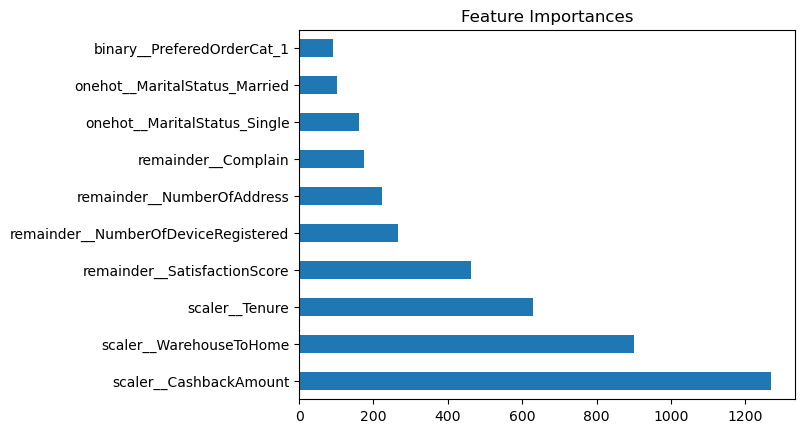

In [ ]:
coefFeat = pd.Series(best_model['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = False).head(10)
coefFeat.plot(kind='barh', title='Feature Importances')
plt.show()

Berdasarkan grafik tersebut, terlihat pada model LGBM akhir bahwa fitur `CashbackAmount` adalah yang paling signifikan, kemudian diikuti oleh `WarehouseToHome`, dan `Tenure`. Fitur lainnya memiliki importance yang cukup rendah, namun bukan berarti diabaikan, tapi hanya lebih fokus pada ketiga fitur penting yang terlihat.

#### Shapley

In [ ]:
import shap

# Initialize the SHAP explainer
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(x_test[select_A])

# Summary plot
shap.summary_plot(shap_values, x_test[select_A], plot_type="bar")

# Detailed plot for a single instance
shap.force_plot(explainer.expected_value[1], shap_values[1][0], x_test[select_A].iloc[0])

#### Lime

In [ ]:
from lime.lime_tabular import LimeTabularExplainer

# Define the LimeTabularExplainer
explainer = LimeTabularExplainer(
    training_data=np.array(x_train[select_A]),
    mode="classification",
    feature_names=x_train[select_A].columns,
    class_names=['No', 'Yes'],
    discretize_continuous=True
)

# Select an instance for explanation
instance_idx = 0
exp = explainer.explain_instance(
    data_row=x_test[select_A].iloc[instance_idx],
    predict_fn=best_model.predict_proba
)

# Show the explanation
exp.show_in_notebook(show_table=True, show_all=False)

### 2. Prediction Probability Scatter Plot & Model Simulation

In [ ]:
predicted_values = best_model['model'].predict(X_test)
predicted_probabilities = best_model['model'].predict_proba(X_test)[:, 1]  # Probability of the positive class

results_conclusion = pd.DataFrame({
    'Predicted Values': predicted_values,
    'Predicted Probabilities': predicted_probabilities
})

plt.figure(figsize=(10, 6))
plt.scatter(results['Predicted Values'], results['Predicted Probabilities'], alpha=0.5)
plt.title('Predicted Values vs. Predicted Probabilities')
plt.xlabel('Predicted Values (0 or 1)')
plt.ylabel('Predicted Probabilities')
plt.axhline(y=0.5, color='r', linestyle='--')  # Add a threshold line
plt.show()


1. **Axes:**
   - The x-axis shows the predicted class (0 or 1).
   - The y-axis shows the predicted probabilities for the positive class (1).

2. **Expected Outcomes:**
   - Points near the y=1 line and x=1 indicate high confidence in predicting the positive class (subscribed to the deposit).
   - Points near the y=0 line and x=0 indicate high confidence in predicting the negative class (not subscribed).
   - Points near the threshold (y=0.5) might indicate uncertainty, where the model is less confident in its predictions.

3. **Interpretation:**
   - If many points are scattered around the threshold line, it may suggest that the model struggles with certain data points, indicating potential areas for improvement.
   - Analyzing the distribution of points can help identify if the model is well-calibrated or if adjustments are needed.

### 3. Confusion Matrix

Tentu mengetahui fitur apa saja yang paling berpengaruh untuk model akhir LGBM adalah penting untuk menjawab analisa kita sebelumnya.

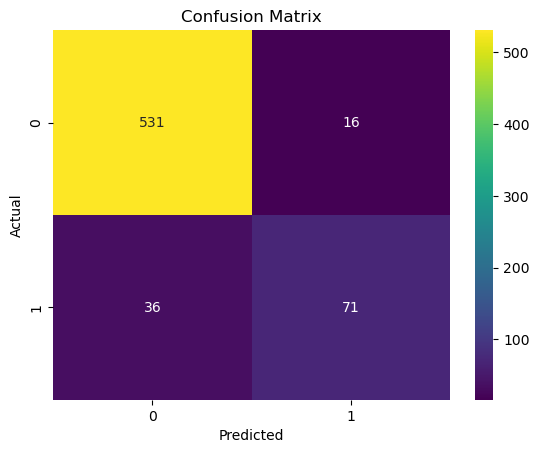

In [ ]:
cm_test = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Calculation Example
Berdasarkan hasil classification report dari model, dapat disimpulkan jika model digunakan untuk prediksi list customer yang akan churn, maka model ini dapat mengurangi 93% customer yang berpotensi loyal atau tidak churn untuk tidak perusahaan fokuskan dalam alokasi biaya promosi atau bahkan bisa ditiadakan, dan model ini mendapatkan 78% customer yang churn dari seluruh customer churn berdasarkan recall.

Model ini memiliki presisi prediksi customer yang churn sebesar 70%. Hal ini berarti setiap kali model memprediksi bahwa seorang customer akan churn, kemungkinan tebakannya benar itu sebesar kurang lebih 70%. Oleh karena itu, masih ada False Positive atau akan ada customer yang sebenarnya tidak churn tetapi diprediksi model sebagai customer yang churn sebanyak 7% dari keseluruhan customer yang tidak churn berdasarkan recall.

Bila diandaikan biaya promosi per customer itu 50 USD dan jumlah customer dalam suatu kurun waktu sebanyak 200 orang di mana 100 orang churn, maka dalam kasus bisnis bisa dihitung sebagai berikut :

Tanpa Model (semua customer dianggap potensi churn dan ditawarkan promosi) :
- Total Biaya promosi = 200 x 50 USD = 10,000 USD
- Biaya yang terbuang = 100 x 50 USD = 5,000 USD
- Jumlah penghematan = 0 USD

Dengan Model (hanya customer yang diprediksi oleh model churn yang kita check dan tawarkan) :
- Total Biaya promosi = (78 x 50 USD) + (7 x 50 USD) = 3050 USD + 760 USD = 4,250 USD
- Biaya yang terbuang = (100-(78+7)) x 50 USD = 750 USD 
- Jumlah penghematan = 10,000 - 4,250 = 5,750 USD

Berdasarkan contoh hitungan sederhana tersebut, terlihat bahwa dengan menggunakan model klasifikasi dan memprediksi berapa banyak porsi customer yang kemungkina churn, maka perusahaan tersebut dapat menghemat biaya yang cukup besar tanpa mengorbankan terlalu banyak customer yang churn.

## H. Recommendation

Hal-hal yang bisa dilakukan untuk developer untuk mengembangkan proyek dan modelnya :
1. Membuat kebijakan dan sistem penjagaan input yang mendorong setiap kandidat untuk mengisi semua data yang diperlukan.
2. Memberi opsi input untuk yang memang tidak ada atau nol.
3. Menambahkan fitur baru yang kemungkinan bisa berhubungan dengan churn, seperti informasi yang terkait dengan pembayaran order dan deskripsi lain customer.
4. Mencoba algoritma ML lain dan melakukan hyperparameter tuning yang lebih advanced.
5. Mencoba grid search untuk metode fill pada cleaning.
6. Menganalisa data yang model masih salah tebak untuk mengetahui karakteristik data tersebut, yang pada akhirnya akan dialurkan untuk menambah fitur atau feature engineering lagi.

Rekomendasi terhadap data :
1. a
2. a

Rekomendasi terhadap user dan stakeholder, **bank marketing division**:
1. Memperbanyak survey demi pengumpulan data yang lebih banyak secara volume maupun lebih beragam.
2. Menawarkan promosi atau strategi lain yang menawarkan sebuah insentif pada customer atau pelanggan agar tertarik dan tidak churn.
3. Berdasar feature importance, cashback dapat ditingkatkan untuk customer yang berpotensi untuk churn.
4. Customer yang memiliki tujuan pengiriman jauh dapat diberi promo agar dapat mengurangi churn akibat alasan terkait seperti biaya delivery mahal ataupun lamanya delivery.
5. Berdasarkan Tenure, perusahaan dapat mengadakan strategi marketing yang mendorong insentif untuk orang yang baru-baru memesan.
